# Poverty Prediction - Data Exploration 

Standard set of libraries to import

In [2]:
import scipy as sp
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
os.sep
os.getcwd()

path='C:\\Users\\mail4\\AnacondaProjects\\Competition_1\\'

In [4]:
# import the data Houshold Data has one index 'id' and Individual Data has two indexs 'id' and 'iid'
path ='C:\\Users\\mail4\\AnacondaProjects\\Competition_1\\'

ha=pd.read_csv(os.path.join(path,'train\\Pover-T_Tests_Predicting_Poverty_-_Country_A_Household_Train.csv'),index_col='id')
hb=pd.read_csv(os.path.join(path,'train\\Pover-T_Tests_Predicting_Poverty_-_Country_B_Household_Train.csv'),index_col='id')
hc=pd.read_csv(os.path.join(path,'train\\Pover-T_Tests_Predicting_Poverty_-_Country_C_Household_Train.csv'),index_col='id')
ia=pd.read_csv(os.path.join(path,'train\\Pover-T_Tests_Predicting_Poverty_-_Country_A_Individual_Train.csv'),index_col=['id','iid'])
ib=pd.read_csv(os.path.join(path,'train\\Pover-T_Tests_Predicting_Poverty_-_Country_B_Individual_Train.csv'),index_col=['id','iid'])
ic=pd.read_csv(os.path.join(path,'train\\Pover-T_Tests_Predicting_Poverty_-_Country_C_Individual_Train.csv'),index_col=['id','iid'])

tha=pd.read_csv(os.path.join(path,'test\\Pover-T_Tests_Predicting_Poverty_-_Country_A_Household_Test.csv'),index_col='id')
thb=pd.read_csv(os.path.join(path,'test\\Pover-T_Tests_Predicting_Poverty_-_Country_B_Household_Test.csv'),index_col='id')
thc=pd.read_csv(os.path.join(path,'test\\Pover-T_Tests_Predicting_Poverty_-_Country_C_Household_Test.csv'),index_col='id')
tia=pd.read_csv(os.path.join(path,'test\\Pover-T_Tests_Predicting_Poverty_-_Country_A_Individual_Test.csv'),index_col=['id','iid'])
tib=pd.read_csv(os.path.join(path,'test\\Pover-T_Tests_Predicting_Poverty_-_Country_B_Individual_Test.csv'),index_col=['id','iid'])
tic=pd.read_csv(os.path.join(path,'test\\Pover-T_Tests_Predicting_Poverty_-_Country_C_Individual_Test.csv'),index_col=['id','iid'])
#remember the index's for each data set
tha_index=tha.index
thb_index=thb.index
thc_index=thc.index
tia_index=tia.index
tib_index=tib.index
tic_index=tic.index

In [5]:
# a little script to make sure that the test and training data have
# the same number of columns and one hot encoded columns that do not 
# appear in the test data are filled with 0's

def test_to_train_reshape(train_df, test_df):
    temp=pd.DataFrame(columns=train_df.columns)
    result=temp.append(test_df)
    return(result)
    

In [6]:
# Combine the test and train data sets to be preprocessed together 
jha=ha.append(tha)
jhb=hb.append(thb)
jhc=hc.append(thc)
jia=ia.append(tia)
jib=ib.append(tib)
jic=ic.append(tic)
jha.poor=jha.poor.astype('bool',errors='ignore')
jhb.poor=jhb.poor.astype('bool',errors='ignore')
jhc.poor=jhc.poor.astype('bool',errors='ignore')
jia.poor=jia.poor.astype('bool',errors='ignore')
jib.poor=jib.poor.astype('bool',errors='ignore')
jic.poor=jic.poor.astype('bool',errors='ignore')


In [8]:
jha.head()

ALbGNqKm ANBCxZzU AlDbXTlZ AsEmHUzj AtGRGAYi BCehjxAl BIofZdtd BMmgMRvd  \
id                                                                              
46107    DozQi    AQdXQ    aQeIm    GTHec    XNUiY    Pbejz    XXDhf    QZujc   
82739    DozQi    AQdXQ    cecIq    IRaac    XNUiY    Pbejz    XXDhf    QZujc   
9646     DozQi    AQdXQ    cecIq    IRaac    XNUiY    Pbejz    XXDhf    QZujc   
10975    DozQi    AQdXQ    cecIq    IRaac    XNUiY    Pbejz    XXDhf    QZujc   
16463    DozQi    AQdXQ    aQeIm    IRaac    XNUiY    Pbejz    XXDhf    QZujc   

      BbKZUYsB BfGjiYom   ...    yeHQSlwg ytYMzOlW zFkComtB zXPyHBkn zkbPtFyO  \
id                        ...                                                   
46107    VxayU    rLgDV   ...       oQxCJ    RAher    zlEqv    vHHYC    hGOlE   
82739    cyHKs    IwRaw   ...       oQxCJ    RAher    zlEqv    vHHYC    hGOlE   
9646     cyHKs    IwRaw   ...       JqHcg    usARW    JETTQ    vHHYC    hGOlE   
10975    cyHKs    mFeaF   ...       oQxCJ    RAher    zlEqv    vHHYC    hGOlE   
16463    cyHKs    jYUYQ   ...       LiSdw    RAher    zlEqv    vHHYC    hGOlE   

      znHDEHZP ztGMreNV zuMWFXax zvjiUrCR zzwlWZZC  
id                                                  
46107    OCLak    cKUPi    guZuT    rpmnk    CtanB  
82739    OCLak    cKUPi    guZuT    rpmnk    CtanB  
9646     uDkol    cKUPi    NATrp    wjqLD    Xtgis  
10975    uDkol    cKUPi    guZuT    rpmnk    CtanB  
16463    OCLak    cKUPi    guZuT    rpmnk    CtanB  

[5 rows x 345 columns]

In [9]:
jha.describe(include='all').transpose()

count unique    top   freq mean  std  min  25%  50%  75%  max
ALbGNqKm  12244      2  DozQi  11929  NaN  NaN  NaN  NaN  NaN  NaN  NaN
ANBCxZzU  12244      2  AQdXQ  11242  NaN  NaN  NaN  NaN  NaN  NaN  NaN
AlDbXTlZ  12244      2  cecIq   8098  NaN  NaN  NaN  NaN  NaN  NaN  NaN
AsEmHUzj  12244      8  IRaac   6827  NaN  NaN  NaN  NaN  NaN  NaN  NaN
AtGRGAYi  12244      3  XNUiY   5513  NaN  NaN  NaN  NaN  NaN  NaN  NaN
BCehjxAl  12244      2  Pbejz  10706  NaN  NaN  NaN  NaN  NaN  NaN  NaN
BIofZdtd  12244      2  XXDhf  11721  NaN  NaN  NaN  NaN  NaN  NaN  NaN
BMmgMRvd  12244      2  QZujc  11430  NaN  NaN  NaN  NaN  NaN  NaN  NaN
BbKZUYsB  12244      2  cyHKs  11624  NaN  NaN  NaN  NaN  NaN  NaN  NaN
BfGjiYom  12244     13  IwRaw   6883  NaN  NaN  NaN  NaN  NaN  NaN  NaN
BwkgSxCk  12244      2  JHrHU  12212  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CHAQHqqr  12244      2  EVgBS  12215  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CIGUXrRQ  12244      2  gFTzO   7476  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CNkSTLvx  12244      2  wxvvO  10770  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CVCsOVew  12244      2  vKNoE  12062  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CbABToOI  12244      3  tIJga  10644  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CbzSWtkF  12244      2  bIVzQ  12033  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CpqWSQcW  12244      2  GHLFz  11732  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CqqwKRSn  12244      3  VgUWq   9190  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CrfscGZl  12244      2  ccdEk   7567  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CsGvKKBJ  12244      2  MaXfS  10717  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CtFxPQPT  12244      2  vSqQC  12219  NaN  NaN  NaN  NaN  NaN  NaN  NaN
CtHqaXhY  12244      3  rKtpo   8495  NaN  NaN  NaN  NaN  NaN  NaN  NaN
DNAfxPzs  12244      2  toKrg   7116  NaN  NaN  NaN  NaN  NaN  NaN  NaN
DbUNVFwv  12244      2  qFmHi   7694  NaN  NaN  NaN  NaN  NaN  NaN  NaN
DsKacCdL  12244      2  ZYabk  11528  NaN  NaN  NaN  NaN  NaN  NaN  NaN
DxLvCGgv  12244      2  GEOXc   7114  NaN  NaN  NaN  NaN  NaN  NaN  NaN
EJgrQqET  12244      2  wdCvs   9249  NaN  NaN  NaN  NaN  NaN  NaN  NaN
EMDSHIlJ  12244      2  dOgle  12113  NaN  NaN  NaN  NaN  NaN  NaN  NaN
EQKKRGkR  12244      2  NBpDn   7861  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...         ...    ...    ...    ...  ...  ...  ...  ...  ...  ...  ...
udzhtHIr  12244      2  BZdVV  11904  NaN  NaN  NaN  NaN  NaN  NaN  NaN
uizuNzbk  12244      2  faIKi  12032  NaN  NaN  NaN  NaN  NaN  NaN  NaN
vRIvQXtC  12244      6  BaOCK   7845  NaN  NaN  NaN  NaN  NaN  NaN  NaN
vmZttwFZ  12244      2  hACfi  12204  NaN  NaN  NaN  NaN  NaN  NaN  NaN
vwpsXRGk  12244     31  esAQH    572  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wBXbHZmp  12244      2  JhtDR  12077  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wEbmsuJO  12244      2  lkvLr   7858  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wKVwRQIp  12244      2  eZUdE   9022  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wKcZtLNv  12244      2  BSdHw  11999  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wakWLjkG  12244      2  DBYFB   7488  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wgWdGBOp  12244      2  ZLoQH  11930  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wnESwOiN  12244      3  uZJuw   7896  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wwfmpuWA  12244      2  obtnu  11071  NaN  NaN  NaN  NaN  NaN  NaN  NaN
wxDnGIwN  12244      2  XrqGT  10603  NaN  NaN  NaN  NaN  NaN  NaN  NaN
xNUUjCIL  12244      2  UlAvd  12237  NaN  NaN  NaN  NaN  NaN  NaN  NaN
xZBEXWPR  12244      2  eXQfr  10095  NaN  NaN  NaN  NaN  NaN  NaN  NaN
xkUFKUoW  12244      2  lKjvc   7967  NaN  NaN  NaN  NaN  NaN  NaN  NaN
yHbEDILT  12244      2  vfweT  12136  NaN  NaN  NaN  NaN  NaN  NaN  NaN
ySkAFOzx  12244      3  yCngx  10714  NaN  NaN  NaN  NaN  NaN  NaN  NaN
yaHLJxDD  12244      3  mXeMx  10790  NaN  NaN  NaN  NaN  NaN  NaN  NaN
yeHQSlwg  12244      9  oQxCJ  11296  NaN  NaN  NaN  NaN  NaN  NaN  NaN
ytYMzOlW  12244      2  RAher  11356  NaN  NaN  NaN  NaN  NaN  NaN  NaN
zFkComtB  12244      3  zlEqv   8202  NaN  NaN  NaN  NaN  NaN  NaN  NaN
zXPyHBkn  12244      2  vHHYC  12102  NaN  NaN  Na

In [10]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [11]:
hb.head()

RzaXNcgd LfWEhutI jXOqJdNL  wJthinfa PTLgvdlQ  ZvEApWrk euTESpHe  \
id                                                                       
57071    zTghO    pYfmQ    lNhMv        42    RQnVj       103    jpSeC   
18973    zTghO    pYfmQ    lNhMv        34    iuxWN        -2    OLVWN   
20151    zTghO    pYfmQ    lNhMv        34    iuxWN       313    OMRWa   
5730     zTghO    pYfmQ    lNhMv        58    iuxWN       138    jpSeC   
35033    zTghO    pYfmQ    lNhMv       122    iuxWN        68    OLVWN   

      bDVMMSYY aSzMhjgD ZehDbxxy   ...   YVMuyCUV AZVtosGB toZzckhe BkiXyuSp  \
id                                 ...                                         
57071    FDqwJ    rxJJI    IbWRL   ...      nZcTi    pdvWY    LLuZj    qpzpO   
18973    FDqwJ    ufugi    IbWRL   ...      nZcTi    XrijK    LLuZj    qpzpO   
20151    FDqwJ    rxJJI    IbWRL   ...      nZcTi    FEjSW    lmjln    qpzpO   
5730     FDqwJ    rxJJI    IbWRL   ...      nZcTi    XrijK    lmjln    ZZzXr   
35033    FDqwJ    rxJJI    IbWRL   ...      nZcTi    CRHYU    lmjln    qpzpO   

      ggucvVUs VMvwrYds VlNidRNP rljjAmaN ChbSWYhO country  
id                                                          
57071    kZRgh    VwGOP    DScEf    SKBnS    Enull       B  
18973    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
20151    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
5730     kZRgh    VwGOP    ZwQQe    SKBnS    Enull       B  
35033    kZRgh    VwGOP    WFgZH    SKBnS    Enull       B  

[5 rows x 442 columns]

In [12]:
hb.describe(include='all').transpose()

count unique    top  freq     mean      std  min  25%  50%  75%   max
RzaXNcgd  3255      5  zTghO  3219      NaN      NaN  NaN  NaN  NaN  NaN   NaN
LfWEhutI  3255      2  pYfmQ  3124      NaN      NaN  NaN  NaN  NaN  NaN   NaN
jXOqJdNL  3255      2  lNhMv  2875      NaN      NaN  NaN  NaN  NaN  NaN   NaN
wJthinfa  3255    NaN    NaN   NaN  43.3813  22.7284 -126   26   42   58   122
PTLgvdlQ  3255      3  iuxWN  2773      NaN      NaN  NaN  NaN  NaN  NaN   NaN
ZvEApWrk  3255    NaN    NaN   NaN  96.0409  105.557   -2   33   68  138  1069
euTESpHe  3255      8  OLVWN  2131      NaN      NaN  NaN  NaN  NaN  NaN   NaN
bDVMMSYY  3255      5  FDqwJ  2578      NaN      NaN  NaN  NaN  NaN  NaN   NaN
aSzMhjgD  3255      2  rxJJI  2542      NaN      NaN  NaN  NaN  NaN  NaN   NaN
ZehDbxxy  3255      1  IbWRL  3255      NaN      NaN  NaN  NaN  NaN  NaN   NaN
KSvXiVMQ  3255      3  LEsmb  2773      NaN      NaN  NaN  NaN  NaN  NaN   NaN
jvRvzpHY  3255      2  vLGqr  2742      NaN      NaN  NaN  NaN  NaN  NaN   NaN
KhWjSXeq  3255      2  ynvnc  3125      NaN      NaN  NaN  NaN  NaN  NaN   NaN
AGTZjfHh  3255      3  bXaNy  2085      NaN      NaN  NaN  NaN  NaN  NaN   NaN
RcHBfZnL  3255      2  eufRK  2835      NaN      NaN  NaN  NaN  NaN  NaN   NaN
hQDJpUTd  3255      2  diAse  2680      NaN      NaN  NaN  NaN  NaN  NaN   NaN
ctmENvnX  3255      8  NQkDX  1351      NaN      NaN  NaN  NaN  NaN  NaN   NaN
bPMmpCzY  3255      2  bIXNO  3073      NaN      NaN  NaN  NaN  NaN  NaN   NaN
RHbMtDgf  3255      2  HOOZh  3254      NaN      NaN  NaN  NaN  NaN  NaN   NaN
vEHGhMJy  3255      2  MGLVV  3252      NaN      NaN  NaN  NaN  NaN  NaN   NaN
qNlGOBmo  3255      1  XyOZw  3255      NaN      NaN  NaN  NaN  NaN  NaN   NaN
HXZbkgqh  3255      7  VqXhE  1567      NaN      NaN  NaN  NaN  NaN  NaN   NaN
xJCsoNuK  3255      5  LBecT  2938      NaN      NaN  NaN  NaN  NaN  NaN   NaN
WprttbBZ  3255      3  QAswg  1567      NaN      NaN  NaN  NaN  NaN  NaN   NaN
zMxwwVGT  3255      5  CsFqg  1374      NaN      NaN  NaN  NaN  NaN  NaN   NaN
OBmNvzaR  3255      2  kMPwa  3253      NaN      NaN  NaN  NaN  NaN  NaN   NaN
BCNRNJEP  3255      3  YZSYX  1588      NaN      NaN  NaN  NaN  NaN  NaN   NaN
LirWSCzE  3255      3  nJMlN  2773      NaN      NaN  NaN  NaN  NaN  NaN   NaN
VQMXmqDx  3255      2  vBTRc  2456      NaN      NaN  NaN  NaN  NaN  NaN   NaN
vuQrLzvK  3255    NaN    NaN   NaN  17.4273  72.0579 -125  -39   27   77   127
...        ...    ...    ...   ...      ...      ...  ...  ...  ...  ...   ...
wUkYKsUa  3255      2  geOGy  2504      NaN      NaN  NaN  NaN  NaN  NaN   NaN
shoeXCtj  3255      2  QgvXT  2919      NaN      NaN  NaN  NaN  NaN  NaN   NaN
fbvIbDTI  3255      2  ACTxs  1900      NaN      NaN  NaN  NaN  NaN  NaN   NaN
xeiqbZTq  3255      2  nWYEM  3225      NaN      NaN  NaN  NaN  NaN  NaN   NaN
UAMKrWmV  3255      2  FvHTb  3202      NaN      NaN  NaN  NaN  NaN  NaN   NaN
jzDWcWaX  3255      2  rpMcv  3240      NaN      NaN  NaN  NaN  NaN  NaN   NaN
vyjislCZ  3255      2  oljlq  2726      NaN      NaN  NaN  NaN  NaN  NaN   NaN
yNAjPhul  3255      5  DvcMy  2204      NaN      NaN  NaN  NaN  NaN  NaN   NaN
hXNbfLBM  3255      2  oFgHU  2588      NaN      NaN  NaN  NaN  NaN  NaN   NaN
bmlzNlAT  3255      2  rpdQy  1995      NaN      NaN  NaN  NaN  NaN  NaN   NaN
HhjyoxLf  3255      2  Qovzu  3252      NaN      NaN  NaN  NaN  NaN  NaN   NaN
kmXNWkcV  3255      4  lSlOK  1671      NaN      NaN  NaN  NaN  NaN  NaN   NaN
DReKkasS  3255      2  Rpukv  3242      NaN      NaN  NaN  NaN  NaN  NaN   NaN
yiSzYJUB  3255      2  aXiub  3118      NaN      NaN  NaN  NaN  NaN  NaN   NaN
IHyQIkcb  3255      2  pDMqY  3241      NaN      NaN  NaN  NaN  NaN  NaN   NaN
wrQeesfo  3255      2  MzMDc  2732      NaN      NaN  NaN  NaN  NaN  NaN   NaN
NWrMiMxI  3255      5  AeOzY  2025      NaN      NaN  NaN  NaN  NaN  NaN   NaN
OGjOCVTC  3255      2  pNROT  2458      NaN      NaN  NaN  NaN  NaN  NaN   NaN
FSXRVaTu  3255      4  fLwHs  2639      NaN      NaN  NaN  

In [13]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


In [14]:
hc.head()


GRGAYimk DNnBfiSI cNDTCUPU GvTJUYOo vmKoAlVH  LhUIIEHQ DTNyjXJp  \
id                                                                      
57211    RslOh    SuNUt    gJLrc    EPKkJ    qKiiE         7    XuMYE   
62519    jPUAt    boDkI    gJLrc    EPKkJ    YXkKd         7    XuMYE   
11614    OpTiw    boDkI    vURog    EPKkJ    qKiiE         9    XuMYE   
6470     RslOh    VgxgY    gJLrc    EPKkJ    YXkKd         9    zfhKi   
33558    IXFlv    VgxgY    kPTaD    EPKkJ    YXkKd         9    XuMYE   

       PNAiwXUz ABnhybHK yiuxBjHP   ...   AJHrHUkH PaEKIlvv bFEsoTgJ ihACfisf  \
id                                  ...                                         
57211        -5    QqETe    umyco   ...      laFxs    kBQRJ    qcUVH    AmPtx   
62519       331    sEJgr    yYwlq   ...      laFxs    kBQRJ    eusFW    AmPtx   
11614        -1    sEJgr    umyco   ...      laFxs    oUXSJ    eusFW    AmPtx   
6470         -5    sEJgr    umyco   ...      laFxs    kBQRJ    jqrBN    AmPtx   
33558        23    sEJgr    umyco   ...      laFxs    kBQRJ    eusFW    AmPtx   

      obIQUcpS  lAvdypjD  ARWytYMz eqJPmiPb mmoCpqWS country  
id                                                            
57211    YXwVA     jSoky     NwjRA    wnPqZ       52       C  
62519    LSPRW     jSoky     NwjRA    wnPqZ      100       C  
11614    YXwVA     jSoky     NwjRA    wnPqZ       70       C  
6470     YXwVA     jSoky     NwjRA    wnPqZ       10       C  
33558    LSPRW     jSoky     herus    wnPqZ       -5       C  

[5 rows x 164 columns]

In [15]:
jib.describe(include='all').transpose()

count unique    top   freq      mean      std  min    25%   50%  \
AFSIVjPG  30318      3  zxuaL  22031       NaN      NaN  NaN    NaN   NaN   
AJgudnHB     40    NaN    NaN    NaN     26.85  64.3508    4  6.875    13   
AxEjAWSE  30318      4  rOmBS  30170       NaN      NaN  NaN    NaN   NaN   
BXZfamTt  30318      3  OMAba  18911       NaN      NaN  NaN    NaN   NaN   
BhPvRtpj  30318      5  ugfFd  30172       NaN      NaN  NaN    NaN   NaN   
BoxViLPz   8147    NaN    NaN    NaN  -33.9104  18.1509  -68    -50   -32   
BqXRUQgi  30318     75  UwdIX   9751       NaN      NaN  NaN    NaN   NaN   
CLTXEwmz   8148    NaN    NaN    NaN   2.48883   1.5803    2      2     2   
CnQHDRVZ  30318      8  lUoRY  30156       NaN      NaN  NaN    NaN   NaN   
CtIAiLwz  30318      4  WGkAx  27282       NaN      NaN  NaN    NaN   NaN   
DAeoUuuN  30318      3  kOlhN  30301       NaN      NaN  NaN    NaN   NaN   
DELHTNkd  30318      3  ExaxN  28484       NaN      NaN  NaN    NaN   NaN   
DSttkpSI   8147    NaN    NaN    NaN  -12.0063  44.7106 -626     -3    -3   
DWmTWcUm  30318      5  MAFfK  30156       NaN      NaN  NaN    NaN   NaN   
DYgxQeEi     74    NaN    NaN    NaN  -142.851  160.977 -800   -200   -80   
DsHJnzeZ  30318      7  xdvtE  27282       NaN      NaN  NaN    NaN   NaN   
DtcKwIEv   1479    NaN    NaN    NaN   7.21163  1.72319  -11      7     8   
ENQEzjVj  30318      3  AJXyE  28952       NaN      NaN  NaN    NaN   NaN   
ETgxnJOM   1490    NaN    NaN    NaN  -14.0591  39.1414 -352    -20     4   
EfqFGRSF  30318     12  EYUhv  29443       NaN      NaN  NaN    NaN   NaN   
EpWsJmrF  30318      3  KToyu  28941       NaN      NaN  NaN    NaN   NaN   
ErqgHOEp  30318      5  lGbPx  30156       NaN      NaN  NaN    NaN   NaN   
EzGVhUlW  30318      8  cbuDg  11597       NaN      NaN  NaN    NaN   NaN   
FHoVOXib  30318     10  eztBC  27222       NaN      NaN  NaN    NaN   NaN   
FOIfEcny  30318      8  WRMpA  11868       NaN      NaN  NaN    NaN   NaN   
FgnMveDS  30318      6  YCDxr  27282       NaN      NaN  NaN    NaN   NaN   
FldbnriM  30318      3  kBfAd  27222       NaN      NaN  NaN    NaN   NaN   
FsUFnmgF  30318     17  LpWKt  19259       NaN      NaN  NaN    NaN   NaN   
Ftzawcsw  30318     16  wnWvh  28839       NaN      NaN  NaN    NaN   NaN   
FyXQULwx  30318      4  OBaph  27282       NaN      NaN  NaN    NaN   NaN   
...         ...    ...    ...    ...       ...      ...  ...    ...   ...   
tkFVflRJ  30318      3  BplVZ  16577       NaN      NaN  NaN    NaN   NaN   
tugScLvF  30318      3  kJcMb  23790       NaN      NaN  NaN    NaN   NaN   
tzYvQeOb   3036    NaN    NaN    NaN  -676.129  187.885 -810   -810  -810   
uDVGRBVU  30318      5  utTVH  22551       NaN      NaN  NaN    NaN   NaN   
uDmhgsaQ    641    NaN    NaN    NaN    38.766  39.8133    1     17    25   
ulQCDoYe  30318    NaN    NaN    NaN  -21.4055  67.7294 -127    -77   -32   
unRAgFtX   2430    NaN    NaN    NaN  -89.0407  92.0663 -644   -122 -54.5   
uyhBLPFL  30318     12  lczKW  29678       NaN      NaN  NaN    NaN   NaN   
vVyGhGoB  30318      3  sOBnN  30250       NaN      NaN  NaN    NaN   NaN   
vquBDhol  30318      3  elRKB  29796       NaN      NaN  NaN    NaN   NaN   
wEtnhPQs  30318      7  VprmC  22175       NaN      NaN  NaN    NaN   NaN   
wJthinfa  30318    NaN    NaN    NaN  0.492315  3.05357   -6     -2     0   
wpoJgbis  30318      3  LgwDt  17887       NaN      NaN  NaN    NaN   NaN   
xMysunyA  30318      7  ssoMZ  30223       NaN      NaN  NaN    NaN   NaN   
xNhKVNgq  30318      3  nRABU  18920       NaN      NaN  NaN    NaN   NaN   
xTZOLcSX  30318      3  BJIIK  29647       NaN      NaN  NaN    NaN   NaN   
xbOnnZEV  30318      3  IfRPA  29982       NaN      NaN  NaN    NaN   NaN   
xhqvDVIs  30318      3  aIbya  22031       NaN      NaN  NaN    NaN   NaN   
xlJGUBXM  30318     10  CcJnP  15668       NaN      NaN  NaN    NaN   NaN   
xohFWnds  30318      5  sbRVc  22031       NaN      NaN  NaN    NaN   NaN   
yNHqwY

In [16]:
jia.head()

AQpdiRUz AjYsrafY AoLwmlEH CRLlSiFu CaukPfUC FPQrjGnS GNaMafZC  \
id    iid                                                                  
80389 1      SowpV    kVYrO    XNPgB    dpMMl    mOlYV    scxJu    sitaC   
      2      SowpV    OLBHI    XNPgB    SjaWF    mOlYV    scxJu    sitaC   
      3      QjTos    OLBHI    vSaJn    ndArQ    mOlYV    bJTYb    sitaC   
      4      nUKzL    OLBHI    vSaJn    ndArQ    yAyAe    bJTYb    sitaC   
39883 1      SowpV    sqnlK    OeQKE    SjaWF    mOlYV    scxJu    sitaC   

          HeUgMnzF KsFoQcUV MUrHEJeh   ...    nLUXHpZr   poor qYRZCuJD  \
id    iid                              ...                               
80389 1      XJsPz    kpkiH    qmOVd   ...       CneHb   True    fohru   
      2      XJsPz    HgfUG    qmOVd   ...       CneHb   True    fohru   
      3      TRFeI    HgfUG    qmOVd   ...       CneHb   True    oEref   
      4      XJsPz    HgfUG    mEGPl   ...       vvXmD   True    fohru   
39883 1      XJsPz    kpkiH    qmOVd   ...       CneHb  False    fohru   

           qqVibbSA rFpoTXAq rQWIpTiG tbgZsPXD ukWqmeSS xqUooaNJ zTLPJYTw  
id    iid                                                                  
80389 1       QQdHS    Hikoa    xUYIC    yOwsR      181    dSJoN    VneGw  
      2       QQdHS    Hikoa    xUYIC    yOwsR      141    JTCKs    VneGw  
      3       QQdHS    Hikoa    rkLqZ    yOwsR       41    JTCKs    zncPX  
      4       QQdHS    Hikoa    jVHyH    yOwsR       16    JTCKs    rXEFU  
39883 1       QQdHS    Hikoa    xUYIC    yOwsR      381    UaIsy    VneGw  

[5 rows x 42 columns]

In [17]:
jia.describe(include='all').transpose()

count unique    top   freq     mean      std  min  25%  50%  75%  \
AQpdiRUz  56095      3  SowpV  19691      NaN      NaN  NaN  NaN  NaN  NaN   
AjYsrafY  56095      5  OLBHI  52263      NaN      NaN  NaN  NaN  NaN  NaN   
AoLwmlEH  56095      6  OeQKE  29188      NaN      NaN  NaN  NaN  NaN  NaN   
CRLlSiFu  56095     19  ndArQ  36408      NaN      NaN  NaN  NaN  NaN  NaN   
CaukPfUC  56095      3  mOlYV  32516      NaN      NaN  NaN  NaN  NaN  NaN   
FPQrjGnS  56095      8  scxJu  26633      NaN      NaN  NaN  NaN  NaN  NaN   
GNaMafZC  56095      4  sitaC  52421      NaN      NaN  NaN  NaN  NaN  NaN   
HeUgMnzF  56095     25  XJsPz  38873      NaN      NaN  NaN  NaN  NaN  NaN   
KsFoQcUV  56095      5  HgfUG  52260      NaN      NaN  NaN  NaN  NaN  NaN   
MUrHEJeh  56095      3  qmOVd  45501      NaN      NaN  NaN  NaN  NaN  NaN   
MgCoFhXK  56095      3  uEstx  34853      NaN      NaN  NaN  NaN  NaN  NaN   
MzEtIdUF  56095      3  axSTs  42843      NaN      NaN  NaN  NaN  NaN  NaN   
NAxEQZVi  56095      8  GIApU  52423      NaN      NaN  NaN  NaN  NaN  NaN   
OdXpbPGJ  46764    NaN    NaN    NaN  8.69964   20.995    4    4    4    4   
QKzxTGus  56095      3  WNISg  26263      NaN      NaN  NaN  NaN  NaN  NaN   
QvgxCmCV  56095      8  AyuSE  28351      NaN      NaN  NaN  NaN  NaN  NaN   
RXcLsVAQ  56095      9  zQvdC  52662      NaN      NaN  NaN  NaN  NaN  NaN   
SGeOiUlZ  56095     11  OlSuJ  47784      NaN      NaN  NaN  NaN  NaN  NaN   
SWoXNmPc  56095      6  onRNG  37941      NaN      NaN  NaN  NaN  NaN  NaN   
UsmeXdIS  56095      7  olfwp  21746      NaN      NaN  NaN  NaN  NaN  NaN   
XBldkztv  56095      2  tbsMf  29751      NaN      NaN  NaN  NaN  NaN  NaN   
XONDGWjH  56095     15  fOUHD  32507      NaN      NaN  NaN  NaN  NaN  NaN   
XacGrSou  56095     25  VzUws  17644      NaN      NaN  NaN  NaN  NaN  NaN   
XizJGmbu  56095      3  juMSt  38437      NaN      NaN  NaN  NaN  NaN  NaN   
country   56095      1      A  56095      NaN      NaN  NaN  NaN  NaN  NaN   
cxWuAOZv  56095      3  QkRds  53847      NaN      NaN  NaN  NaN  NaN  NaN   
eXbOkwhI  56095      3  YXCNt  55927      NaN      NaN  NaN  NaN  NaN  NaN   
gtnNTNam  56095     16  CXizI  43872      NaN      NaN  NaN  NaN  NaN  NaN   
hOamrctW  56095     15  rrHdI  37381      NaN      NaN  NaN  NaN  NaN  NaN   
igHwZsYz  56095     12  YwljV  30282      NaN      NaN  NaN  NaN  NaN  NaN   
jYpOAjPW  56095      3  KOjYm  55641      NaN      NaN  NaN  NaN  NaN  NaN   
kvMGuSDN  56095      2  Qydia  28689      NaN      NaN  NaN  NaN  NaN  NaN   
nLUXHpZr  56095      8  CneHb  29587      NaN      NaN  NaN  NaN  NaN  NaN   
poor      56095      2   True  38219      NaN      NaN  NaN  NaN  NaN  NaN   
qYRZCuJD  56095      3  fohru  37400      NaN      NaN  NaN  NaN  NaN  NaN   
qqVibbSA  56095      8  QQdHS  55408      NaN      NaN  NaN  NaN  NaN  NaN   
rFpoTXAq  56095      3  Hikoa  53573      NaN      NaN  NaN  NaN  NaN  NaN   
rQWIpTiG  56095      3  xUYIC  24262      NaN      NaN  NaN  NaN  NaN  NaN   
tbgZsPXD  56095      2  yOwsR  52662      NaN      NaN  NaN  NaN  NaN  NaN   
ukWqmeSS  56095    NaN    NaN    NaN  106.908  91.5178    1   36   81  151   
xqUooaNJ  56095      5  JTCKs  52232      NaN      NaN  NaN  NaN  NaN  NaN   
zTLPJYTw  56095      4  VneGw  21194      NaN      NaN  NaN  NaN  NaN  NaN   

          max  
AQpdiRUz  NaN  
AjYsrafY  NaN  
AoLwmlEH  NaN  
CRLlSiFu  NaN  
CaukPfUC  NaN  
FPQrjGnS  NaN  
GNaMafZC  NaN  
HeUgMnzF  NaN  
KsFoQcUV  NaN  
MUrHEJeh  NaN  
MgCoFhXK  NaN  
MzEtIdUF  NaN  
NAxEQZVi  NaN  
OdXpbPGJ  214  
QKzxTGus  NaN  
QvgxCmCV  NaN  
RXcLsVAQ  NaN  
SGeOiUlZ  NaN  
SWoXNmPc  NaN  
UsmeXdIS  NaN  
XBldkztv  NaN  
XONDGWjH  NaN  
XacGrSou  NaN  
XizJGmbu  NaN  
country   NaN  
cxWuAOZv  NaN  
eXbOkwhI  NaN  
gtnNTNam  NaN  
hOamrctW  NaN  
igHwZsYz  NaN  
jYpOAjPW  NaN  
kvMGuSDN  NaN  
nLUXHpZr  NaN  
poor      NaN  
qYRZCuJD  NaN  
qqVibbSA  NaN  
rFpoTXAq  NaN  
rQWIpTiG  NaN  
tbgZsPXD  NaN  
ukWqmeSS  551  

In [18]:
jib.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30318 entries, (62801, 1) to (90283, 6)
Columns: 225 entries, AFSIVjPG to zuvYUDSL
dtypes: bool(1), float64(28), int64(4), object(192)
memory usage: 52.0+ MB


In [19]:
ib.head()

MmKGUOrD splgBZfe JTCCBpjX akGaJaYF eYoMkEyN bmhTgzYu  BoxViLPz  \
id    iid                                                                   
62801 1      ZZKZW    CLRvF    QEcpz    wmLgk    VsLed    LRmij       NaN   
      2      ZZKZW    CLRvF    QEcpz    wmLgk    VsLed    lfpaq       NaN   
      3      ZZKZW    CLRvF    QEcpz    wmLgk    cRkfb    LRmij     -68.0   
20689 1      ZZKZW    CLRvF    QEcpz    wmLgk    VsLed    LRmij       NaN   
      2      ZZKZW    CLRvF    QEcpz    wmLgk    VsLed    lfpaq       NaN   

          GjxOmHgp  qlLzyqpP mYMBWfIH   ...    aYGuxgyP NZYkmhkD fxWioPPP  \
id    iid                               ...                                 
62801 1      rLPoG       NaN    wBmmA   ...       rlTrR    uCOQO    UYIFp   
      2      rLPoG       NaN    wBmmA   ...       rlTrR    uCOQO    UYIFp   
      3      rLPoG       NaN    mhxNR   ...       rlTrR    uCOQO    UYIFp   
20689 1      rLPoG       NaN    wBmmA   ...       rlTrR    uCOQO    UYIFp   
      2      rLPoG      -9.0    wBmmA   ...       rlTrR    uCOQO    UYIFp   

          ulQCDoYe tzYvQeOb  DWmTWcUm PxgyaWYq NfpXxGQk cavdrXpj  country  
id    iid                                                                  
62801 1          9      NaN     MAFfK    VnOFM  -7827.0    uJXdA        B  
      2         29      NaN     MAFfK    VnOFM      NaN    uJXdA        B  
      3        -82      NaN     MAFfK    VnOFM      NaN    uJXdA        B  
20689 1         -6      NaN     MAFfK    ppEcI  -7867.0    uJXdA        B  
      2         19      NaN     MAFfK    ppEcI  -7987.0    uJXdA        B  

[5 rows x 225 columns]

In [20]:
ib.describe(include='all').transpose()


count unique    top   freq      mean      std   min   25%   50%  \
MmKGUOrD  20252      4  ZZKZW  15879       NaN      NaN   NaN   NaN   NaN   
splgBZfe  20252     14  CLRvF  14695       NaN      NaN   NaN   NaN   NaN   
JTCCBpjX  20252      3  QEcpz  12787       NaN      NaN   NaN   NaN   NaN   
akGaJaYF  20252      3  wmLgk  12737       NaN      NaN   NaN   NaN   NaN   
eYoMkEyN  20252      3  VsLed  14793       NaN      NaN   NaN   NaN   NaN   
bmhTgzYu  20252      2  lfpaq  10347       NaN      NaN   NaN   NaN   NaN   
BoxViLPz   5459    NaN    NaN    NaN   -34.296  18.3573   -68   -50   -32   
GjxOmHgp  20252      4  rLPoG  20224       NaN      NaN   NaN   NaN   NaN   
qlLzyqpP   1185    NaN    NaN    NaN  -38.2759  30.2773  -177   -51   -33   
mYMBWfIH  20252      2  mhxNR  10406       NaN      NaN   NaN   NaN   NaN   
SZucUQmM  20252      4  SYvDi  19357       NaN      NaN   NaN   NaN   NaN   
EfqFGRSF  20252     12  EYUhv  19662       NaN      NaN   NaN   NaN   NaN   
plDSQDzp  20252      3  fzxDF  18600       NaN      NaN   NaN   NaN   NaN   
jyZvBZlo  20252      9  nTjeS  19138       NaN      NaN   NaN   NaN   NaN   
gyxBUEPe  20252      4  tEehU  12854       NaN      NaN   NaN   NaN   NaN   
unRAgFtX   1652    NaN    NaN    NaN  -87.3511  89.9762  -644  -122   -50   
lTdxcpBA  20252      3  AwAZH  19286       NaN      NaN   NaN   NaN   NaN   
yoijDqAm  20252      8  pVzHd   8015       NaN      NaN   NaN   NaN   NaN   
LkhgHzsx  20252      4  gouHj  18227       NaN      NaN   NaN   NaN   NaN   
TJGiunYp  12454    NaN    NaN    NaN  0.629758  1.80103    -1     0     0   
WmKLEUcd    354    NaN    NaN    NaN   1.16102  3.99285   -19    -1     2   
poor      20252      2  False  18375       NaN      NaN   NaN   NaN   NaN   
UUYXAsfo  20252      4  WuYiW  12854       NaN      NaN   NaN   NaN   NaN   
IPBrAaYt  20252      7  DMMRj  20159       NaN      NaN   NaN   NaN   NaN   
hCgDHGEc  20252      3  XYMAP   9622       NaN      NaN   NaN   NaN   NaN   
GFXSuQvB  20252      3  BAepu  15856       NaN      NaN   NaN   NaN   NaN   
UPtsFglH  20252      3  ZKHtO  19435       NaN      NaN   NaN   NaN   NaN   
HZEsXrsF  20252     75  jdddH  18110       NaN      NaN   NaN   NaN   NaN   
kgVoFHRj  20252     13  MwltS  19189       NaN      NaN   NaN   NaN   NaN   
pqbNHKuK  20252      8  mJIJq   7824       NaN      NaN   NaN   NaN   NaN   
...         ...    ...    ...    ...       ...      ...   ...   ...   ...   
xTZOLcSX  20252      3  BJIIK  19809       NaN      NaN   NaN   NaN   NaN   
nxAFXxLQ    361    NaN    NaN    NaN   1148.72  2258.04   152   602   902   
eWNUvdjK  20252      3  DTzrG  19891       NaN      NaN   NaN   NaN   NaN   
mAeaImix  16524    NaN    NaN    NaN  -8.76374   3.2307   -28    -8    -8   
yxQmKfsS  20252      7  bfgeg  20153       NaN      NaN   NaN   NaN   NaN   
PyTDmsQl  20252      5  NMtVW  10406       NaN      NaN   NaN   NaN   NaN   
CnQHDRVZ  20252      8  lUoRY  20153       NaN      NaN   NaN   NaN   NaN   
VxXEkbdS  20252      4  ahACm  12854       NaN      NaN   NaN   NaN   NaN   
vVyGhGoB  20252      3  sOBnN  20211       NaN      NaN   NaN   NaN   NaN   
qRplnnEM  20252      4  bywyW  12854       NaN      NaN   NaN   NaN   NaN   
SCLDdPrm  20252      4  KhlzK  12854       NaN      NaN   NaN   NaN   NaN   
HcutWGCs  20252      2  aDlJD  12478       NaN      NaN   NaN   NaN   NaN   
GlkLFREL  20252      4  Bovxn  12854       NaN      NaN   NaN   NaN   NaN   
NAZxDkiV  20252      2  HzgoY  19259       NaN      NaN   NaN   NaN   NaN   
yjAfWuLb  20252      4  hEagh  18227       NaN      NaN   NaN   NaN   NaN   
HZqPmvkr    438    NaN    NaN    NaN   21.5479  17.3921    -4     8    20   
GlktDEEv  20252     12  JehJJ  14695       NaN      NaN   NaN   NaN   NaN   
IIvMcTrH  20252      4  JCGsD  12854       NaN      NaN   NaN   NaN   NaN   
JbDBFPPd  20252      5  VBmxq  20153       NaN      NaN   NaN   NaN   NaN   
clCRDApV  20252      4  yWVRJ  14695       NaN      NaN   NaN   NaN   NaN   
aYGuxg

In [21]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29913 entries, (30639, 1) to (42883, 4)
Data columns (total 42 columns):
OoqEwyJF    29913 non-null object
cJPCnaAs    29913 non-null object
vIUDQhEE    29913 non-null object
cRHfBOQd    29913 non-null object
dAmhsMgC    29913 non-null object
skzSFBmO    29913 non-null object
IsqnlKAj    29913 non-null object
AOSWkWKB    29913 non-null object
IThGOCux    29913 non-null object
gBTGbFhG    29913 non-null object
XKQWlRjk    29913 non-null int64
CggtnNTN    29913 non-null object
TfEUOijE    29913 non-null object
tOfmAJyI    29913 non-null object
vWNISgEA    29913 non-null int64
FRcdTUFo    29913 non-null object
wXJsPzSl    29913 non-null object
bsMfXBld    29913 non-null float64
EaHvfzfT    29913 non-null object
XDnwpOpR    29913 non-null object
uOlSuJDG    29913 non-null object
CjuMStGt    29913 non-null object
ymHYOZZv    29913 non-null object
eXdISXQe    29913 non-null object
WqmeSStq    29913 non-null object
XKyOwsRR    29913 non-null i

In [22]:
ic.head()


OoqEwyJF cJPCnaAs vIUDQhEE cRHfBOQd dAmhsMgC skzSFBmO IsqnlKAj  \
id    iid                                                                  
30639 1      cEcbt    QhmHR    lJvCX    sgjYl    IpTiG    WFHaK    GpnOQ   
      2      cEcbt    QhmHR    lJvCX    sgjYl    IpTiG    WFHaK    UaIsy   
      3      cEcbt    cMeuH    lJvCX    sgjYl    IpTiG    WFHaK    JTCKs   
      9      cEcbt    uSuzR    lJvCX    GpRit    uEstx    WFHaK    JTCKs   
      10     cEcbt    uSuzR    lJvCX    GpRit    uEstx    WFHaK    JTCKs   

          AOSWkWKB IThGOCux gBTGbFhG   ...    dArQTUaf NAxEQZVi ShCKQiAy  \
id    iid                              ...                                 
30639 1      nLEWH    PVIia    amOeQ   ...       iRUzd    Rihyc    INYbJ   
      2      nLEWH    MyWVa    amOeQ   ...       VYpjn    Rihyc    TYbsc   
      3      nLEWH    ehUOC    KEvSa   ...       iQpoG    GkrMH    xJurw   
      9      nLEWH    UrHEJ    JnveI   ...       iQpoG    Rihyc    iuiyo   
      10     nLEWH    UrHEJ    JnveI   ...       iQpoG    Rihyc    iuiyo   

          rkLqZrQW  VGJlUgVG kMVbipfP sCTSWhXf  rVneGwzn uVFOfrpa country  
id    iid                                                                  
30639 1      SoOdX     VlcEt    zzxBZ    yQhuJ     xgpHA    DnIbO       C  
      2      SoOdX     VlcEt    zzxBZ    yQhuJ     xgpHA    DnIbO       C  
      3      pbPGJ     YYwlj    rPkFE    yQhuJ     ldKFc    kXobL       C  
      9      SoOdX     YYwlj    zzxBZ    yQhuJ     QGHnL    xRxWC       C  
      10     SoOdX     YYwlj    zzxBZ    yQhuJ     QGHnL    xRxWC       C  

[5 rows x 42 columns]

In [23]:
ic.describe(include='all').transpose()

count unique    top   freq     mean      std      min  25%  50%  \
OoqEwyJF  29913      2  cEcbt  29386      NaN      NaN      NaN  NaN  NaN   
cJPCnaAs  29913     10  QhmHR  10421      NaN      NaN      NaN  NaN  NaN   
vIUDQhEE  29913      4  lJvCX  23103      NaN      NaN      NaN  NaN  NaN   
cRHfBOQd  29913      4  sgjYl  13210      NaN      NaN      NaN  NaN  NaN   
dAmhsMgC  29913      3  IpTiG  25199      NaN      NaN      NaN  NaN  NaN   
skzSFBmO  29913      3  WFHaK  28427      NaN      NaN      NaN  NaN  NaN   
IsqnlKAj  29913     19  JTCKs  20925      NaN      NaN      NaN  NaN  NaN   
AOSWkWKB  29913      2  nLEWH  18170      NaN      NaN      NaN  NaN  NaN   
IThGOCux  29913     21  lJlxl   4017      NaN      NaN      NaN  NaN  NaN   
gBTGbFhG  29913      4  JnveI  12527      NaN      NaN      NaN  NaN  NaN   
XKQWlRjk  29913    NaN    NaN    NaN  1.48183  48.9921     -128    1    1   
CggtnNTN  29913      4  hAGot  18708      NaN      NaN      NaN  NaN  NaN   
TfEUOijE  29913     12  ISjaW  20925      NaN      NaN      NaN  NaN  NaN   
tOfmAJyI  29913      4  mlNXN  11638      NaN      NaN      NaN  NaN  NaN   
vWNISgEA  29913    NaN    NaN    NaN  22.2948  31.6154        9    9    9   
FRcdTUFo  29913     62  NwYCR  20925      NaN      NaN      NaN  NaN  NaN   
wXJsPzSl  29913      4  EFUMy  14611      NaN      NaN      NaN  NaN  NaN   
bsMfXBld  29913    NaN    NaN    NaN  5.31719  9.15848      -69    9    9   
EaHvfzfT  29913      5  xHsSQ  16626      NaN      NaN      NaN  NaN  NaN   
XDnwpOpR  29913      4  DUVzU  21156      NaN      NaN      NaN  NaN  NaN   
uOlSuJDG  29913      3  HelFU  28398      NaN      NaN      NaN  NaN  NaN   
CjuMStGt  29913      3  lYVyA  28806      NaN      NaN      NaN  NaN  NaN   
ymHYOZZv  29913      4  GHDuu  21976      NaN      NaN      NaN  NaN  NaN   
eXdISXQe  29913     10  dxzZA  29339      NaN      NaN      NaN  NaN  NaN   
WqmeSStq  29913      2  DGWjH  15813      NaN      NaN      NaN  NaN  NaN   
XKyOwsRR  29913    NaN    NaN    NaN  196.691  280.885       -3   -3   -3   
XDzQvdCw  29913      2  PBUwt  16164      NaN      NaN      NaN  NaN  NaN   
CgAkQtOd  29913    NaN    NaN    NaN -14.9492  20.3339 -325.367   -7   -7   
UTyHNliH  29913      5  FbTRU   9891      NaN      NaN      NaN  NaN  NaN   
poor      29913      2  False  22868      NaN      NaN      NaN  NaN  NaN   
gxCmCVUk  29913      7  wNFGx  21672      NaN      NaN      NaN  NaN  NaN   
qGqYslGF  29913     13  rAwcc   3365      NaN      NaN      NaN  NaN  NaN   
dArQTUaf  29913     31  iQpoG  20925      NaN      NaN      NaN  NaN  NaN   
NAxEQZVi  29913      4  Rihyc  15288      NaN      NaN      NaN  NaN  NaN   
ShCKQiAy  29913      9  xJurw   9265      NaN      NaN      NaN  NaN  NaN   
rkLqZrQW  29913      4  SoOdX  25158      NaN      NaN      NaN  NaN  NaN   
VGJlUgVG  29913      7  YYwlj  20925      NaN      NaN      NaN  NaN  NaN   
kMVbipfP  29913     12  zzxBZ  15288      NaN      NaN      NaN  NaN  NaN   
sCTSWhXf  29913      3  yQhuJ  28121      NaN      NaN      NaN  NaN  NaN   
rVneGwzn  29913      4  ldKFc  15498      NaN      NaN      NaN  NaN  NaN   
uVFOfrpa  29913      4  xRxWC  16124      NaN      NaN      NaN  NaN  NaN   
country   29913      1      C  29913      NaN      NaN      NaN  NaN  NaN   

          75%  max  
OoqEwyJF  NaN  NaN  
cJPCnaAs  NaN  NaN  
vIUDQhEE  NaN  NaN  
cRHfBOQd  NaN  NaN  
dAmhsMgC  NaN  NaN  
skzSFBmO  NaN  NaN  
IsqnlKAj  NaN  NaN  
AOSWkWKB  NaN  NaN  
IThGOCux  NaN  NaN  
gBTGbFhG  NaN  NaN  
XKQWlRjk    1  125  
CggtnNTN  NaN  NaN  
TfEUOijE  NaN  NaN  
tOfmAJyI  NaN  NaN  
vWNISgEA    9  149  
FRcdTUFo  NaN  NaN  
wXJsPzSl  NaN  NaN  
bsMfXBld    9    9  
EaHvfzfT  NaN  NaN  
XDnwpOpR  NaN  NaN  
uOlSuJDG  NaN  NaN  
CjuMStGt  NaN  NaN  
ymHYOZZv  NaN  NaN  
eXdISXQe  NaN  NaN  
WqmeSStq  NaN  NaN  
XKyOwsRR  381  949  
XDzQvdCw  NaN  NaN  
CgAkQtOd   -7   -7  
UTyHNliH  NaN  NaN  
poor      NaN  NaN  
gxCmCVUk  NaN  NaN  
qGqYslGF  NaN  NaN  
dArQT

In [24]:
print('\nHousehold A:\n',jha.poor.describe())
print('\nHousehold B:\n',jhb.poor.describe())
print('\nHousehold C:\n',jhc.poor.describe())
print('\nIndividual A:\n',jia.poor.describe())
print('\nIndividial B:\n',jib.poor.describe())
print('\nIndividual C:\n',jic.poor.describe())
ha.info()


Household A:
 count     12244
unique        2
top        True
freq       7744
Name: poor, dtype: object

Household B:
 count      4859
unique        2
top       False
freq       3004
Name: poor, dtype: object

Household C:
 count      9656
unique        2
top       False
freq       5496
Name: poor, dtype: object

Individual A:
 count     56095
unique        2
top        True
freq      38219
Name: poor, dtype: object

Individial B:
 count     30318
unique        2
top       False
freq      18375
Name: poor, dtype: object

Individual C:
 count     44614
unique        2
top       False
freq      22868
Name: poor, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB


# Pre Processing the data sets

it doesn't look like thier are all that many Nul values in the data sets so thought that converting the catagorical fields into sparse machine interpritable binary classified fields is a good place to start



In [25]:
# script to do a simple scaling of the data using MiMaxScalar function, 
# making sure that the columns retain there headings
from sklearn.preprocessing import MinMaxScaler
def scale_the_data(df):
    scalar= MinMaxScaler()
    scalar.fit(df.values)
    test_v=scalar.transform(df.values)
    newDF=pd.DataFrame(test_v,columns=df.columns,index=df.index)
    return(newDF, scalar)

Creat an alternate table for summary stats that includes Skewness to descide what to do with the null values that there are.

In [26]:
def summary_stats(df):
    
    skew =df.skew()
    mean = df.mean()
    median = df.median()
    variance = df.var()
    count = df.count()
    dic = {'Skewness': skew,'Mean': mean,'Median': median,'Count': count}
    output = pd.DataFrame(dic)
    return (output)


## drop unwanted columns

In [27]:
# drop the unwanted columns 
drop_ha=[]
drop_hb=['FGWqGkmD','umkFMfvA','IrxBnWxE','dnlnKrAg','aAufyreG']
drop_hc=[]
drop_ia=[]
drop_ib=['BoxViLPz','qlLzyqpP','unRAgFtX','WmKLEUcd','DYgxQeEi','jfsTwowc','MGfpfHam','DtcKwIEv','ETgxnJOM','sWElQwuC','jzBRbsEG','CLTXEwmz','WqEZQuJP','DSttkpSI','sIiSADFG','uDmhgsaQ','hdDTwJhQ','AJgudnHB','iZhWxnWa','fyfDnyQk','nxAFXxLQ','HZqPmvkr','tzYvQeOb','NfpXxGQk']
drop_ic=[]
jha=jha.drop(drop_ha,axis=1)
jhb=jhb.drop(drop_hb,axis=1)
jhc=jhc.drop(drop_hc,axis=1)
jia=jia.drop(drop_ia,axis=1)
jib=jib.drop(drop_ib,axis=1)
jic=jic.drop(drop_ic,axis=1)


### Create One Hot Encoded versions of all the data sets

In [28]:
ohe_ha=pd.get_dummies(jha)
ohe_hb=pd.get_dummies(jhb)
ohe_hc=pd.get_dummies(jhc)
ohe_ia=pd.get_dummies(jia)
ohe_ib=pd.get_dummies(jib)
ohe_ic=pd.get_dummies(jic)

In [29]:
    ohe_ha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12244 entries, 46107 to 43344
Columns: 860 entries, OMtioXZZ to zzwlWZZC_Xtgis
dtypes: bool(1), float64(2), int64(2), uint8(855)
memory usage: 10.5 MB


In [30]:
ohe_ha.describe()



OMtioXZZ      TiwRslOh      YFMZwKrU      nEsgxvAq  ALbGNqKm_DozQi  \
count  12244.000000  12244.000000  12244.000000  12244.000000    12244.000000   
mean      17.472885     -4.194708     -2.982114     -7.626266        0.974273   
std       10.761946      4.442522      0.903454      6.001618        0.158326   
min     -127.000000    -33.000000     -4.000000   -100.000000        0.000000   
25%       12.000000     -7.000000     -4.000000    -10.000000        1.000000   
50%       12.000000     -3.000000     -3.000000     -4.000000        1.000000   
75%       21.000000     -1.000000     -2.000000     -4.000000        1.000000   
max      111.000000      3.000000      1.000000     -4.000000        1.000000   

       ALbGNqKm_zvDKy  ANBCxZzU_AQdXQ  ANBCxZzU_PpSAr  AlDbXTlZ_aQeIm  \
count    12244.000000    12244.000000    12244.000000    12244.000000   
mean         0.025727        0.918164        0.081836        0.338615   
std          0.158326        0.274126        0.274126        0.473258   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        1.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          0.000000        1.000000        0.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       AlDbXTlZ_cecIq       ...        znHDEHZP_uDkol  ztGMreNV_cKUPi  \
count    12244.000000       ...          12244.000000    12244.000000   
mean         0.661385       ...              0.759311        0.998285   
std          0.473258       ...              0.427519        0.041380   
min          0.000000       ...              0.000000        0.000000   
25%          0.000000       ...              1.000000        1.000000   
50%          1.000000       ...              1.000000        1.000000   
75%          1.000000       ...              1.000000        1.000000   
max          1.000000       ...              1.000000        1.000000   

       ztGMreNV_fQxZN  zuMWFXax_NATrp  zuMWFXax_guZuT  zuMWFXax_xaQVo  \
count    12244.000000    12244.000000    12244.000000    12244.000000   
mean         0.001715        0.350212        0.644887        0.004900   
std          0.041380        0.477056        0.478567        0.069834   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        1.000000        0.000000   
75%          0.000000        1.000000        1.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       zvjiUrCR_rpmnk  zvjiUrCR_wjqLD  zzwlWZZC_CtanB  zzwlWZZC_Xtgis  
count    12244.000000    12244.000000    12244.000000    12244.000000  
mean         0.992486        0.007514        0.824322        0.175678  
std          0.086360        0.086360        0.380561        0.380561  
min          0.000000        0.000000        0.000000        0.000000  
25%          1.000000        0.000000        1.000000        0.000000  
50%          1.000000        0.000000        1.000000        0.000000  
75%          1.000000        0.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 859 columns]

In [31]:
ohe_ha.describe()

OMtioXZZ      TiwRslOh      YFMZwKrU      nEsgxvAq  ALbGNqKm_DozQi  \
count  12244.000000  12244.000000  12244.000000  12244.000000    12244.000000   
mean      17.472885     -4.194708     -2.982114     -7.626266        0.974273   
std       10.761946      4.442522      0.903454      6.001618        0.158326   
min     -127.000000    -33.000000     -4.000000   -100.000000        0.000000   
25%       12.000000     -7.000000     -4.000000    -10.000000        1.000000   
50%       12.000000     -3.000000     -3.000000     -4.000000        1.000000   
75%       21.000000     -1.000000     -2.000000     -4.000000        1.000000   
max      111.000000      3.000000      1.000000     -4.000000        1.000000   

       ALbGNqKm_zvDKy  ANBCxZzU_AQdXQ  ANBCxZzU_PpSAr  AlDbXTlZ_aQeIm  \
count    12244.000000    12244.000000    12244.000000    12244.000000   
mean         0.025727        0.918164        0.081836        0.338615   
std          0.158326        0.274126        0.274126        0.473258   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        1.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          0.000000        1.000000        0.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       AlDbXTlZ_cecIq       ...        znHDEHZP_uDkol  ztGMreNV_cKUPi  \
count    12244.000000       ...          12244.000000    12244.000000   
mean         0.661385       ...              0.759311        0.998285   
std          0.473258       ...              0.427519        0.041380   
min          0.000000       ...              0.000000        0.000000   
25%          0.000000       ...              1.000000        1.000000   
50%          1.000000       ...              1.000000        1.000000   
75%          1.000000       ...              1.000000        1.000000   
max          1.000000       ...              1.000000        1.000000   

       ztGMreNV_fQxZN  zuMWFXax_NATrp  zuMWFXax_guZuT  zuMWFXax_xaQVo  \
count    12244.000000    12244.000000    12244.000000    12244.000000   
mean         0.001715        0.350212        0.644887        0.004900   
std          0.041380        0.477056        0.478567        0.069834   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        1.000000        0.000000   
75%          0.000000        1.000000        1.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       zvjiUrCR_rpmnk  zvjiUrCR_wjqLD  zzwlWZZC_CtanB  zzwlWZZC_Xtgis  
count    12244.000000    12244.000000    12244.000000    12244.000000  
mean         0.992486        0.007514        0.824322        0.175678  
std          0.086360        0.086360        0.380561        0.380561  
min          0.000000        0.000000        0.000000        0.000000  
25%          1.000000        0.000000        1.000000        0.000000  
50%          1.000000        0.000000        1.000000        0.000000  
75%          1.000000        0.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 859 columns]

In [32]:
ohe_hc.describe()

BBPluVrb     CtFxPQPT      DBjxSUvf     EQSmcscG      EQtGHLFz  \
count  9656.000000  9656.000000  9.656000e+03  9656.000000   9656.000000   
mean      6.277548   -70.342481  4.110542e+04   -75.399751  -9661.000000   
std       0.988288   163.528329  8.080524e+04   218.589484   5575.182867   
min       0.000000 -1611.000000  6.280000e+02 -2700.000000 -19316.000000   
25%       6.000000   -43.000000  9.045500e+03   -40.000000 -14488.500000   
50%       7.000000   -15.000000  1.764200e+04   -10.000000  -9661.000000   
75%       7.000000    -8.000000  3.856750e+04     0.000000  -4833.500000   
max       7.000000    -1.000000  1.675854e+06     0.000000     -6.000000   

          GIwNbAsH     IRMacrkM     LhUIIEHQ    NONtAKOM     PNAiwXUz  \
count  9656.000000  9656.000000  9656.000000  9656.00000  9656.000000   
mean     -3.127382    -4.624379     7.897887    -6.79681    22.604805   
std       6.319061     3.069987     1.474918    10.83012    77.612833   
min     -66.000000   -23.000000     7.000000  -100.00000    -9.000000   
25%      -6.000000    -8.000000     7.000000   -10.00000    -5.000000   
50%      -3.000000    -3.000000     7.000000    -4.00000    -1.000000   
75%       3.000000    -3.000000     9.000000     2.00000     7.000000   
max       3.000000    -3.000000    35.000000     8.00000   711.000000   

            ...        zLrQXqVU_VqCBw  zLrQXqVU_kJUIe  zLrQXqVU_kgSxC  \
count       ...           9656.000000     9656.000000     9656.000000   
mean        ...              0.442212        0.018434        0.537800   
std         ...              0.496675        0.134522        0.498595   
min         ...              0.000000        0.000000        0.000000   
25%         ...              0.000000        0.000000        0.000000   
50%         ...              0.000000        0.000000        1.000000   
75%         ...              1.000000        0.000000        1.000000   
max         ...              1.000000        1.000000        1.000000   

       zaJvluwo_AqglE  zaJvluwo_VtZKo  znHDEHZP_AnCSs  znHDEHZP_OCLak  \
count     9656.000000     9656.000000     9656.000000     9656.000000   
mean         0.068766        0.931234        0.321147        0.234569   
std          0.253068        0.253068        0.466941        0.423751   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        1.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          0.000000        1.000000        1.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       znHDEHZP_uDkol  zyABXhnz_CsslN  zyABXhnz_oPlwY  
count     9656.000000     9656.000000     9656.000000  
mean         0.444283        0.579225        0.420775  
std          0.496912        0.493709        0.493709  
min          0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000  
50%          0.000000        1.000000        0.000000  
75%          1.000000        1.000000        1.000000  
max          1.000000        1.000000        1.000000  

[8 rows x 807 columns]

In [33]:
ohe_ia.describe()

OdXpbPGJ      ukWqmeSS  AQpdiRUz_QjTos  AQpdiRUz_SowpV  \
count  46764.000000  56095.000000    56095.000000    56095.000000   
mean       8.699641    106.908013        0.333862        0.351030   
std       20.994987     91.517819        0.471595        0.477296   
min        4.000000      1.000000        0.000000        0.000000   
25%        4.000000     36.000000        0.000000        0.000000   
50%        4.000000     81.000000        0.000000        0.000000   
75%        4.000000    151.000000        1.000000        1.000000   
max      214.000000    551.000000        1.000000        1.000000   

       AQpdiRUz_nUKzL  AjYsrafY_NTOkI  AjYsrafY_OLBHI  AjYsrafY_kVYrO  \
count    56095.000000    56095.000000    56095.000000    56095.000000   
mean         0.315108        0.005027        0.931687        0.055549   
std          0.464563        0.070725        0.252284        0.229050   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        1.000000        0.000000   
50%          0.000000        0.000000        1.000000        0.000000   
75%          1.000000        0.000000        1.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       AjYsrafY_lCwhY  AjYsrafY_sqnlK       ...        tbgZsPXD_yOwsR  \
count    56095.000000    56095.000000       ...          56095.000000   
mean         0.001765        0.005972       ...              0.938800   
std          0.041974        0.077048       ...              0.239698   
min          0.000000        0.000000       ...              0.000000   
25%          0.000000        0.000000       ...              1.000000   
50%          0.000000        0.000000       ...              1.000000   
75%          0.000000        0.000000       ...              1.000000   
max          1.000000        1.000000       ...              1.000000   

       xqUooaNJ_ALcKg  xqUooaNJ_JTCKs  xqUooaNJ_UaIsy  xqUooaNJ_dSJoN  \
count    56095.000000    56095.000000    56095.000000    56095.000000   
mean         0.000695        0.931135        0.015206        0.045084   
std          0.026359        0.253227        0.122374        0.207491   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        1.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          0.000000        1.000000        0.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       xqUooaNJ_vhhVz  zTLPJYTw_MyJsk  zTLPJYTw_VneGw  zTLPJYTw_rXEFU  \
count    56095.000000    56095.000000    56095.000000    56095.000000   
mean         0.007879        0.000018        0.377823        0.314556   
std          0.088417        0.004222        0.484847        0.464343   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        1.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       zTLPJYTw_zncPX  
count    56095.000000  
mean         0.307603  
std          0.461505  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000  

[8 rows x 277 columns]

In [34]:
ohe_ib.describe()

TJGiunYp      TZDgOhYY      dnmwvCng      esHWAAyG     gKsBCLMY  \
count  18684.000000  19881.000000  30318.000000  19073.000000  30318.00000   
mean       0.622190    998.697148      5.785804     -8.538038    -10.51758   
std        1.798916     55.923256      6.625854      9.544224     10.36790   
min       -1.000000    608.000000      1.000000   -148.000000   -119.00000   
25%        0.000000    968.000000      1.000000     -8.000000     -9.00000   
50%        0.000000    998.000000      5.000000     -8.000000     -9.00000   
75%        1.000000   1028.000000      5.000000     -1.000000     -9.00000   
max       17.000000   1268.000000     65.000000     -1.000000     -9.00000   

           mAeaImix      ulQCDoYe      wJthinfa  AFSIVjPG_hwjzG  \
count  24724.000000  30318.000000  30318.000000    30318.000000   
mean      -8.697460    -21.405535      0.492315        0.165974   
std        3.085778     67.729380      3.053566        0.372063   
min      -28.000000   -127.000000     -6.000000        0.000000   
25%       -8.000000    -77.000000     -2.000000        0.000000   
50%       -8.000000    -32.000000      0.000000        0.000000   
75%       -8.000000     19.000000      2.000000        0.000000   
max       -8.000000    125.000000     14.000000        1.000000   

       AFSIVjPG_iSDzd       ...        zuvYUDSL_JrCwM  zuvYUDSL_MWWYS  \
count    30318.000000       ...          30318.000000    30318.000000   
mean         0.107362       ...              0.616399        0.067056   
std          0.309578       ...              0.486270        0.250123   
min          0.000000       ...              0.000000        0.000000   
25%          0.000000       ...              0.000000        0.000000   
50%          0.000000       ...              1.000000        0.000000   
75%          0.000000       ...              1.000000        0.000000   
max          1.000000       ...              1.000000        1.000000   

       zuvYUDSL_Pawqt  zuvYUDSL_Pkngz  zuvYUDSL_UdyqU  zuvYUDSL_cyIEr  \
count    30318.000000    30318.000000    30318.000000    30318.000000   
mean         0.009961        0.074906        0.025628        0.104756   
std          0.099309        0.263244        0.158026        0.306244   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       zuvYUDSL_eaorN  zuvYUDSL_jWCZV  zuvYUDSL_kexov  zuvYUDSL_phonp  
count    30318.000000    30318.000000    30318.000000    30318.000000  
mean         0.088330        0.003067        0.009796        0.000099  
std          0.283779        0.055301        0.098491        0.009947  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          0.000000        0.000000        0.000000        0.000000  
75%          0.000000        0.000000        0.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 1676 columns]

In [35]:
ohe_ic.describe()

CgAkQtOd      XKQWlRjk      XKyOwsRR      bsMfXBld      vWNISgEA  \
count  44614.000000  44614.000000  44614.000000  44614.000000  44614.000000   
mean     -14.965545      1.793540    196.078047      5.348335     22.164993   
std       22.160669     49.022512    280.946819      9.123842     31.463552   
min    -1797.816400   -128.000000     -3.000000    -69.000000      9.000000   
25%       -7.000000      1.000000     -3.000000      9.000000      9.000000   
50%       -7.000000      1.000000     -3.000000      9.000000      9.000000   
75%       -7.000000      1.000000    381.000000      9.000000      9.000000   
max       -7.000000    125.000000    949.000000      9.000000    149.000000   

       AOSWkWKB_XYcCK  AOSWkWKB_nLEWH  CggtnNTN_AdLvU  CggtnNTN_RxYsa  \
count    44614.000000    44614.000000    44614.000000    44614.000000   
mean         0.387053        0.612947        0.005469        0.368292   
std          0.487081        0.487081        0.073752        0.482347   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          1.000000        1.000000        0.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       CggtnNTN_hAGot       ...        vIUDQhEE_lJvCX  vIUDQhEE_zevDa  \
count    44614.000000       ...          44614.000000    44614.000000   
mean         0.625207       ...              0.770453        0.000807   
std          0.484075       ...              0.420546        0.028395   
min          0.000000       ...              0.000000        0.000000   
25%          0.000000       ...              1.000000        0.000000   
50%          1.000000       ...              1.000000        0.000000   
75%          1.000000       ...              1.000000        0.000000   
max          1.000000       ...              1.000000        1.000000   

       wXJsPzSl_EFUMy  wXJsPzSl_JskzT  wXJsPzSl_LPJYT  wXJsPzSl_cPXrX  \
count    44614.000000    44614.000000    44614.000000    44614.000000   
mean         0.488434        0.029206        0.003228        0.479132   
std          0.499872        0.168386        0.056722        0.499570   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          1.000000        0.000000        0.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       ymHYOZZv_Engma  ymHYOZZv_GHDuu  ymHYOZZv_JiqVt  ymHYOZZv_hOlGY  
count    44614.000000    44614.000000    44614.000000    44614.000000  
mean         0.156363        0.735285        0.006366        0.101986  
std          0.363204        0.441186        0.079532        0.302633  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          0.000000        1.000000        0.000000        0.000000  
75%          0.000000        1.000000        0.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 301 columns]

Split the train data sets into (X, y) (fields, label) pairs

In [36]:
yha=ohe_ha.poor
yhb=ohe_hb.poor
yhc=ohe_hc.poor
yia=ohe_ia.poor
yib=ohe_ib.poor
yic=ohe_ic.poor

Xha=ohe_ha.drop(['poor'],axis=1)
# for Xhb also drop numerical columns that contain a large number of  NUL values 
Xhb=ohe_hb.drop(['poor'],axis=1)
Xhb=Xhb.fillna(Xhb.median())
Xhc=ohe_hc.drop(['poor'],axis=1)
Xia=ohe_ia.drop(['poor'],axis=1)
Xia=Xia.fillna(Xia.median())
Xib=ohe_ib.drop(['poor'],axis=1)
Xib=Xib.fillna(Xib.median())
Xic=ohe_ic.drop(['poor'],axis=1)

In [37]:

Xha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12244 entries, 46107 to 43344
Columns: 859 entries, OMtioXZZ to zzwlWZZC_Xtgis
dtypes: float64(2), int64(2), uint8(855)
memory usage: 10.5 MB


scale the data using a simple minmax scaling to start

In [38]:
Xhas,ha_scale =scale_the_data(Xha)
Xhbs,hb_scale =scale_the_data(Xhb)
Xhcs,hc_scale =scale_the_data(Xhc)
Xias,ia_scale =scale_the_data(Xia)
Xibs,ib_scale =scale_the_data(Xib)
Xics,ic_scale =scale_the_data(Xic)

Test that it has worked

In [39]:
Xias.describe()

OdXpbPGJ      ukWqmeSS  AQpdiRUz_QjTos  AQpdiRUz_SowpV  \
count  56095.000000  56095.000000    56095.000000    56095.000000   
mean       0.018657      0.192560        0.333862        0.351030   
std        0.091663      0.166396        0.471595        0.477296   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.000000      0.063636        0.000000        0.000000   
50%        0.000000      0.145455        0.000000        0.000000   
75%        0.000000      0.272727        1.000000        1.000000   
max        1.000000      1.000000        1.000000        1.000000   

       AQpdiRUz_nUKzL  AjYsrafY_NTOkI  AjYsrafY_OLBHI  AjYsrafY_kVYrO  \
count    56095.000000    56095.000000    56095.000000    56095.000000   
mean         0.315108        0.005027        0.931687        0.055549   
std          0.464563        0.070725        0.252284        0.229050   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        1.000000        0.000000   
50%          0.000000        0.000000        1.000000        0.000000   
75%          1.000000        0.000000        1.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       AjYsrafY_lCwhY  AjYsrafY_sqnlK       ...        tbgZsPXD_yOwsR  \
count    56095.000000    56095.000000       ...          56095.000000   
mean         0.001765        0.005972       ...              0.938800   
std          0.041974        0.077048       ...              0.239698   
min          0.000000        0.000000       ...              0.000000   
25%          0.000000        0.000000       ...              1.000000   
50%          0.000000        0.000000       ...              1.000000   
75%          0.000000        0.000000       ...              1.000000   
max          1.000000        1.000000       ...              1.000000   

       xqUooaNJ_ALcKg  xqUooaNJ_JTCKs  xqUooaNJ_UaIsy  xqUooaNJ_dSJoN  \
count    56095.000000    56095.000000    56095.000000    56095.000000   
mean         0.000695        0.931135        0.015206        0.045084   
std          0.026359        0.253227        0.122374        0.207491   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        1.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          0.000000        1.000000        0.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       xqUooaNJ_vhhVz  zTLPJYTw_MyJsk  zTLPJYTw_VneGw  zTLPJYTw_rXEFU  \
count    56095.000000    56095.000000    56095.000000    56095.000000   
mean         0.007879        0.000018        0.377823        0.314556   
std          0.088417        0.004222        0.484847        0.464343   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        1.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       zTLPJYTw_zncPX  
count    56095.000000  
mean         0.307603  
std          0.461505  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000  

[8 rows x 277 columns]

Lets try out PCA to see what the whole data set looks like together 

In [40]:
import numpy as np
from sklearn.decomposition import PCA

pca_a =PCA(n_components=2)
pca_a.fit(Xhas)
pca_Xha=pca_a.fit_transform(Xhas)

pca_b =PCA(n_components=2)
pca_b.fit(Xhbs)
pca_Xhb=pca_b.fit_transform(Xhbs)

pca_c =PCA(n_components=2)
pca_c.fit(Xhcs)
pca_Xhc=pca_c.fit_transform(Xhcs)

pca_ia =PCA(n_components=2)
pca_ia.fit(Xias)
pca_Xia=pca_ia.fit_transform(Xias)

pca_ib =PCA(n_components=2)
pca_ib.fit(Xibs)
pca_Xib=pca_ib.fit_transform(Xibs)

pca_ic =PCA(n_components=2)
pca_ic.fit(Xics)
pca_Xic=pca_ic.fit_transform(Xics)


Text(0.5,1,'Individuals Country C ')

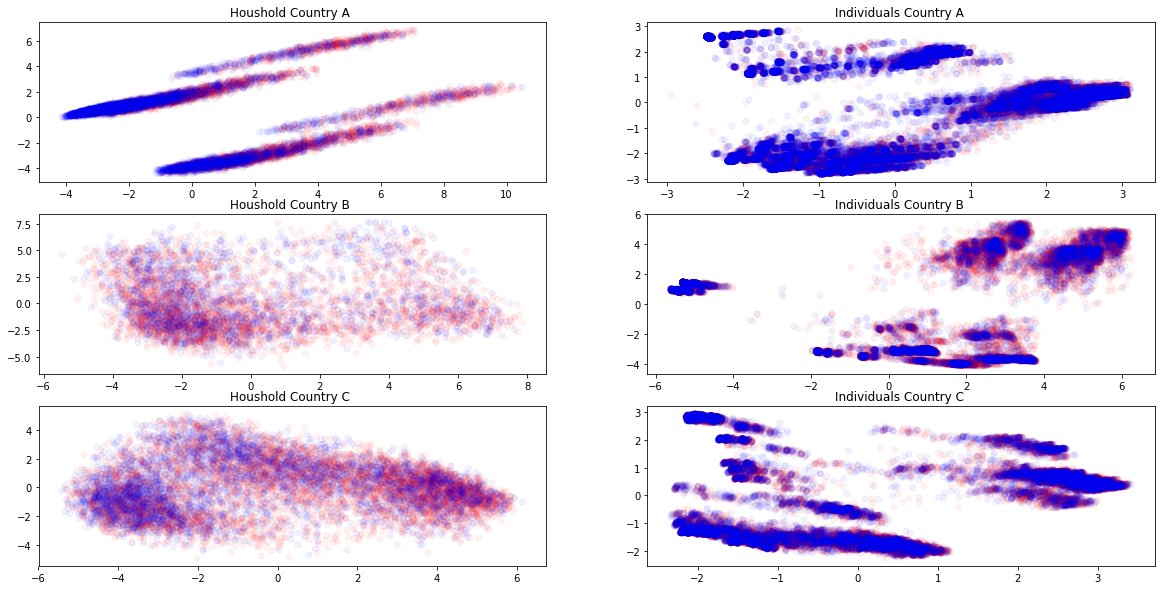

In [41]:
%matplotlib inline
dct={1:'b',0:'r'}

plt.figure(figsize=(20,10))
plt.subplot(321)
colour=list(map(dct.get,yha))
plt.scatter(pca_Xha[:,0],pca_Xha[:,1],c=colour,alpha=0.05)
plt.title('Houshold Country A ')

plt.subplot(323)
colour=list(map(dct.get,yhb))
plt.scatter(pca_Xhb[:,0],pca_Xhb[:,1],c=colour,alpha=0.05)
plt.title('Houshold Country B ')

plt.subplot(325)
colour=list(map(dct.get,yhc))
plt.scatter(pca_Xhc[:,0],pca_Xhc[:,1],c=colour,alpha=0.05)
plt.title('Houshold Country C ')

plt.subplot(322)
colour=list(map(dct.get,yia))
plt.scatter(pca_Xia[:,0],pca_Xia[:,1],c=colour,alpha=0.05)
plt.title('Individuals Country A ')

plt.subplot(324)
colour=list(map(dct.get,yib))
plt.scatter(pca_Xib[:,0],pca_Xib[:,1],c=colour,alpha=0.05)
plt.title('Individuals Country B ')

plt.subplot(326)
colour=list(map(dct.get,yic))
plt.scatter(pca_Xic[:,0],pca_Xic[:,1],c=colour,alpha=0.05)
plt.title('Individuals Country C ')

# Model Fitting...a first try

lets try a couple of sklearn models on the houshold data sets

    -Desision Tree
    -Random Forest
    -Gradient Tree Boosted
    

##### First we need to separate the unlabed  test data back out from the data set 

In [42]:
# separate out the lables 

yha=yha.drop(tha_index,axis=0)
yhb=yhb.drop(thb_index,axis=0)
yhc=yhc.drop(thc_index,axis=0)
yia=yia.drop(tia_index,axis=0)
yib=yib.drop(tib_index,axis=0)
yic=yic.drop(tic_index,axis=0)


In [43]:
Xhas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12244 entries, 46107 to 43344
Columns: 859 entries, OMtioXZZ to zzwlWZZC_Xtgis
dtypes: float64(859)
memory usage: 80.6 MB


In [44]:
# Separate out the data
tXhas=Xhas.loc[tha_index]
tXhbs=Xhbs.loc[thb_index]
tXhcs=Xhcs.loc[thc_index]
tXias=Xias.loc[tia_index]
tXibs=Xibs.loc[tib_index]
tXics=Xics.loc[tic_index]

Xhas=Xhas.drop(tha_index,axis=0)
Xhbs=Xhbs.drop(thb_index,axis=0)
Xhcs=Xhcs.drop(thc_index,axis=0)
Xias=Xias.drop(tia_index,axis=0)
Xibs=Xibs.drop(tib_index,axis=0)
Xics=Xics.drop(tic_index,axis=0)


In [45]:
#split the data traing data set 

from sklearn.model_selection import train_test_split
trainsize=0.90
randomstate=42

X_trainha, X_testha, y_trainha, y_testha = train_test_split(Xhas,yha,train_size=trainsize,random_state=randomstate)
X_trainhb, X_testhb, y_trainhb, y_testhb = train_test_split(Xhbs,yhb,train_size=trainsize,random_state=randomstate)
X_trainhc, X_testhc, y_trainhc, y_testhc = train_test_split(Xhcs,yhc,train_size=trainsize,random_state=randomstate)
X_trainia, X_testia, y_trainia, y_testia = train_test_split(Xias,yia,train_size=trainsize,random_state=randomstate)
X_trainib, X_testib, y_trainib, y_testib = train_test_split(Xibs,yib,train_size=trainsize,random_state=randomstate)
X_trainic, X_testic, y_trainic, y_testic = train_test_split(Xics,yic,train_size=trainsize,random_state=randomstate)


C:\Users\mail4\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [46]:
from sklearn import tree

from sklearn.model_selection import cross_val_score

cv=5

modela= tree.DecisionTreeClassifier()
clfa = modela.fit(X_trainha,y_trainha)
print('Ha score: ',clfa.score(X_testha,y_testha))
CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
print("Cross validation score for Ha:\n",CE_scoresa)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))

modelb = tree.DecisionTreeClassifier()
clfb = modelb.fit(X_trainhb,y_trainhb)
print('\nHb score: ',clfb.score(X_testhb,y_testhb))
CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
print("Cross validation score for Hb:\n",CE_scoresb, )
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))

modelc = tree.DecisionTreeClassifier()
clfc = modelc.fit(X_trainhc,y_trainhc)
print('\nHc score: ',clfc.score(X_testhc,y_testhc))
CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
print("Cross validation score for Hc:\n",CE_scoresc)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))

Ha score:  0.766138855055
Cross validation score for Ha:
 [ 0.76387009  0.75813008  0.77574526  0.7703252   0.77777778]
Accuracy: 0.77 (+/- 0.01)

Hb score:  0.889570552147
Cross validation score for Hb:
 [ 0.86030664  0.84812287  0.86177474  0.87521368  0.85299145]
Accuracy: 0.86 (+/- 0.02)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99055794  0.99141631  0.9871134   0.98883162  0.99312715]
Accuracy: 0.99 (+/- 0.00)


In [47]:
# what does the tree look like
import graphviz 
dot_data = tree.export_graphviz(clfa, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render(" Housholds Country A")

' Housholds Country A.pdf'

In [48]:
# what does the confusion matrix look like 
from sklearn.metrics import confusion_matrix

print("Household Country A:\n",confusion_matrix(y_testha,clfa.predict(X_testha)))
       
print("Household Country B:\n",confusion_matrix(y_testhb,clfb.predict(X_testhb)))

print("Household Country C:\n",confusion_matrix(y_testhc,clfc.predict(X_testhc)))



Household Country A:
 [[357  97]
 [ 95 272]]
Household Country B:
 [[285  23]
 [ 13   5]]
Household Country C:
 [[561   3]
 [  0  83]]


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
cv=5

modela= RandomForestClassifier()
clfa = modela.fit(X_trainha,y_trainha)
print('Ha score: ',clfa.score(X_testha,y_testha))
CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
print("Cross validation score for Ha:\n",CE_scoresa)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))

modelb = RandomForestClassifier()
clfb = modelb.fit(X_trainhb,y_trainhb)
print('\nHb score: ',clfb.score(X_testhb,y_testhb))
CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
print("Cross validation score for Hb:\n",CE_scoresb, )
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))

modelc = RandomForestClassifier()
clfc = modelc.fit(X_trainhc,y_trainhc)
print('\nHc score: ',clfc.score(X_testhc,y_testhc))
CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
print("Cross validation score for Hc:\n",CE_scoresc)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))

Ha score:  0.78197320341
Cross validation score for Ha:
 [ 0.80243572  0.7804878   0.80284553  0.79742547  0.78387534]
Accuracy: 0.79 (+/- 0.02)

Hb score:  0.950920245399
Cross validation score for Hb:
 [ 0.91993186  0.92150171  0.91979522  0.92136752  0.91965812]
Accuracy: 0.92 (+/- 0.00)

Hc score:  0.967542503864
Cross validation score for Hc:
 [ 0.90729614  0.92961373  0.95532646  0.93814433  0.93041237]
Accuracy: 0.93 (+/- 0.03)


In [50]:
# what does the confusion matrix look like 
from sklearn.metrics import confusion_matrix

print("Household Country A:\n",confusion_matrix(y_testha,clfa.predict(X_testha)))
       
print("Household Country B:\n",confusion_matrix(y_testhb,clfb.predict(X_testhb)))

print("Household Country C:\n",confusion_matrix(y_testhc,clfc.predict(X_testhc)))

Household Country A:
 [[385  69]
 [110 257]]
Household Country B:
 [[308   0]
 [ 16   2]]
Household Country C:
 [[563   1]
 [ 20  63]]


In [51]:
#let try adaboost...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
lr=0.1
md=5
cv=2

modela = GradientBoostingClassifier(loss='exponential', n_estimators=100, learning_rate=lr, max_depth=md, random_state=0)
clfa = modela.fit(X_trainha,y_trainha)
print('Ha score: ',clfa.score(X_testha,y_testha))
CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
print("Cross validation score for Ha:\n",CE_scoresa)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))

modelb = GradientBoostingClassifier(loss='exponential',n_estimators=200, learning_rate=lr, max_depth=md, random_state=0)
clfb = modelb.fit(X_trainhb,y_trainhb)
print('\nHb score: ',clfb.score(X_testhb,y_testhb))
CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
print("Cross validation score for Hb:\n",CE_scoresb, )
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))

modelc = GradientBoostingClassifier(loss='exponential',n_estimators=100, learning_rate=lr, max_depth=md, random_state=0)
clfc = modelc.fit(X_trainhc,y_trainhc)
print('\nHc score: ',clfc.score(X_testhc,y_testhc))
CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
print("Cross validation score for Hc:\n",CE_scoresc)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))


Ha score:  0.857490864799
Cross validation score for Ha:
 [ 0.86643186  0.86345164]
Accuracy: 0.86 (+/- 0.00)

Hb score:  0.950920245399
Cross validation score for Hb:
 [ 0.91467577  0.91666667]
Accuracy: 0.92 (+/- 0.00)

Hc score:  1.0
Cross validation score for Hc:
 [ 0.99209894  0.99450361]
Accuracy: 0.99 (+/- 0.00)


In [52]:
# what does the confusion matrix look like 
from sklearn.metrics import confusion_matrix

print("Household Country A:\n",confusion_matrix(y_testha,clfa.predict(X_testha)))
       
print("\nHousehold Country B:\n",confusion_matrix(y_testhb,clfb.predict(X_testhb)) )

print("\nHousehold Country C:\n",confusion_matrix(y_testhc,clfc.predict(X_testhc)) )



Household Country A:
 [[400  54]
 [ 63 304]]

Household Country B:
 [[307   1]
 [ 15   3]]

Household Country C:
 [[564   0]
 [  0  83]]


Text(0.5,1,'Feature importance for Household Country C data set (Top 100)')

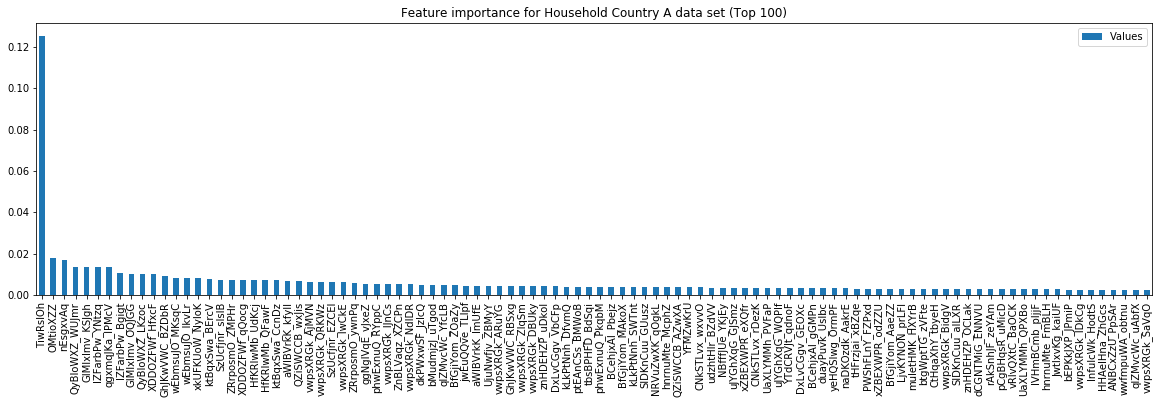

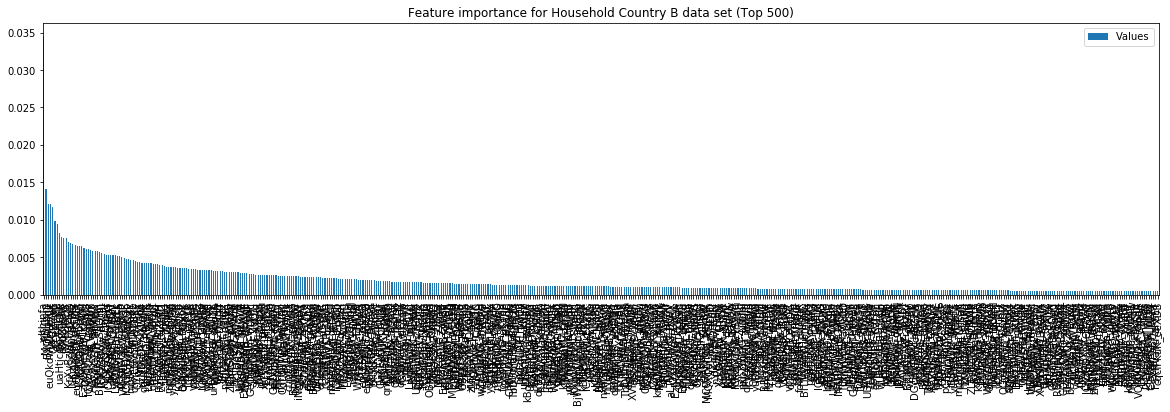

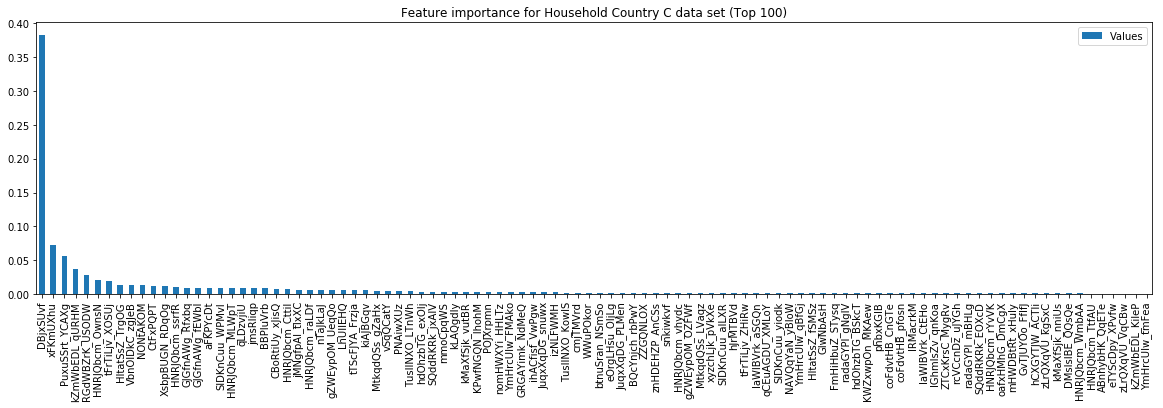

In [53]:
#rank the features by importance
fi_ha=pd.DataFrame(clfa.feature_importances_ ,Xhas.columns, columns=['Values'])
fi_hb=pd.DataFrame(clfb.feature_importances_ ,Xhbs.columns,columns=['Values'])
fi_hc=pd.DataFrame(clfc.feature_importances_ ,Xhcs.columns,columns=['Values'])
#sort the features by thier importance and select the top 50
fi_haf=fi_ha.sort_values(by='Values',ascending=False)[0:100]                                   
fi_hbf=fi_hb.sort_values(by='Values',ascending=False)[0:500]
fi_hcf=fi_hc.sort_values(by='Values',ascending=False)[0:100] # leave out the most important feature " Dbjxsuvf" as it is too dominent to plot
# Plot the distibution

fi_haf.plot(kind='bar',figsize=(20,5)).set_title('Feature importance for Household Country A data set (Top 100)')

fi_hbf.plot(kind='bar',figsize=(20,5)).set_title('Feature importance for Household Country B data set (Top 500)')

fi_hcf.plot(kind='bar',figsize=(20,5)).set_title('Feature importance for Household Country C data set (Top 100)')

In [54]:
# split the one hot encoded catagoricals into feature and value columns sot that a list of the top features
# can be identified rather than just a sub set of the categorical values within them 
df = pd.DataFrame(fi_haf, columns=fi_ha.index);
top_ha=pd.DataFrame(list(df.index.str.split('_')), columns=['Feature','Value']).Feature.unique()

print('\n', top_ha,'\n Number of Unique Features to keep: ',top_ha.size)

df = pd.DataFrame(fi_hbf, columns=fi_ha.index);
top_hb=pd.DataFrame(list(df.index.str.split('_')), columns=['Feature','Value']).Feature.unique()

print('\n', top_hb,'\n Number of Unique Features to keep: ',top_hb.size)

df = pd.DataFrame(fi_hcf, columns=fi_ha.index);
top_hc=pd.DataFrame(list(df.index.str.split('_')), columns=['Feature','Value']).Feature.unique()
print('\n', top_hc,'\n Number of Unique Features to keep: ',top_hc.size)



 ['TiwRslOh' 'OMtioXZZ' 'nEsgxvAq' 'QyBloWXZ' 'GIMIxlmv' 'IZFarbPw'
 'qgxmqJKa' 'XDDOZFWf' 'GhJKwVWC' 'wEbmsuJO' 'xkUFKUoW' 'ktBqxSwa'
 'SzUcfjnr' 'ZRrposmO' 'HfKRIwMb' 'aWlBVrkK' 'QZiSWCCB' 'vwpsXRGk'
 'ggNglVqE' 'phwExnuQ' 'ZnBLVaqz' 'dkPWxwSF' 'bMudmjzJ' 'qlZMvcWc'
 'BfGjiYom' 'jwEuQQve' 'UjuNwfjv' 'znHDEHZP' 'DxLvCGgv' 'kLkPtNnh'
 'ptEAnCSs' 'tbsBPHFD' 'BCehjxAl' 'SlDKnCuu' 'NRVuZwXK' 'hnrnuMte'
 'YFMZwKrU' 'CNkSTLvx' 'udzhtHIr' 'NBfffJUe' 'uJYGhXqG' 'xZBEXWPR'
 'UaXLYMMh' 'YTdCRVJt' 'duayPuvk' 'yeHQSlwg' 'naDKOzdk' 'tHFrzjai'
 'PWShFLnY' 'LjvKYNON' 'muIetHMK' 'btgWptTG' 'CtHqaXhY' 'dCGNTMiG'
 'rAkSnhJF' 'pCgBHqsR' 'vRIvQXtC' 'lVHmBCmb' 'JwtIxvKg' 'bEPKkJXP'
 'lnfulcWk' 'HHAeIHna' 'ANBCxZzU' 'wwfmpuWA'] 
 Number of Unique Features to keep:  64

 ['wJthinfa' 'McFBIGsm' 'BXOWgPgL' 'euQkdwLD' 'vuQrLzvK' 'GrLBZowF'
 'qrOrXLPM' 'uaHtjcqx' 'OSmfjCbE' 'cDhZjxaW' 'IOMvIGQS' 'KrXvBzVi'
 'ldnyeZwD' 'lCKzGQow' 'rljjAmaN' 'toNGbjGF' 'EzhQmeWB' 'QYqvTSvV'
 'rCVqiShm' 'AZVtosGB' 'UCdxjZfA' 'Qqr

# Before we try to do any thing fancy wth feature engineering Lets construct a pipline to predict the test data values using AddaBoost so we can sumbit it and see where we stand in the comp

In [55]:
path ='C:\\Users\\mail4\\AnacondaProjects\\Competition_1\\'
# The template that we have to submit  is the following:
sub_template=pd.read_csv(os.path.join(path,'Pover-T_Tests_Predicting_Poverty_-_Submission_Format.csv'),header=0,index_col='id')

In [56]:
sub_template.head()

country  poor
id                 
418         A   0.5
41249       A   0.5
16205       A   0.5
97501       A   0.5
67756       A   0.5

In [57]:
# so the three models that have been trained are clfa,clfb and clfc

ada_model_ha =clfa
ada_model_hb =clfb
ada_model_hc =clfc

test_suba = pd.DataFrame(ada_model_ha.predict_proba(tXhas),columns=['False','True'],index=tha_index)
test_subb = pd.DataFrame(ada_model_hb.predict_proba(tXhbs),columns=['False','True'],index=thb_index)
test_subc = pd.DataFrame(ada_model_hc.predict_proba(tXhcs),columns=['False','True'],index=thc_index)
temp_sub=test_suba.append(test_subb).append(test_subc)


# We've got a model tath works for households now lets explore the 'Individual' data sets

first visulise the numerical relaition ships then visulise the catagorical distributions 

In [58]:
# for each numeric column plot 
# select the sumeric columns
Xian_col=Xia.select_dtypes(exclude=[np.uint8])
Xibn_col=Xib.select_dtypes(exclude=[np.uint8])
Xicn_col=Xic.select_dtypes(exclude=[np.uint8])
# pick the numberic columns from the nomalised data sets
Xians=Xias.loc[:,Xian_col.columns]
Xibns=Xibs.loc[:,Xibn_col.columns]
Xicns=Xics.loc[:,Xicn_col.columns]

ias= Xians.join(yia, lsuffix='_Xians',rsuffix='yia')
ibs= Xibns.join(yib, lsuffix='_Xibns',rsuffix='yib')
ics= Xicns.join(yic, lsuffix='_Xicns',rsuffix='yic')
ias.head()

OdXpbPGJ  ukWqmeSS   poor
id    iid                           
80389 1         0.0  0.327273   True
      2         0.0  0.254545   True
      3         0.0  0.072727   True
      4         0.0  0.027273   True
39883 1         0.0  0.690909  False

In [59]:
ibs.head()

TJGiunYp  TZDgOhYY  dnmwvCng  esHWAAyG  gKsBCLMY  mAeaImix  \
id    iid                                                               
62801 1    0.055556  0.672727    0.0000  1.000000  0.090909       1.0   
      2    0.055556  0.454545    0.0000  1.000000  1.000000       1.0   
      3    0.055556  0.654545    0.0000  1.000000  1.000000       1.0   
20689 1    0.055556  0.590909    0.0625  0.952381  0.000000       1.0   
      2    0.055556  0.545455    0.0625  0.952381  1.000000       1.0   

           ulQCDoYe  wJthinfa   poor  
id    iid                             
62801 1    0.539683      0.10  False  
      2    0.619048      0.10  False  
      3    0.178571      0.10  False  
20689 1    0.480159      0.45   True  
      2    0.579365      0.45   True

In [60]:
ics.head()

CgAkQtOd  XKQWlRjk  XKyOwsRR  bsMfXBld  vWNISgEA   poor
id    iid                                                         
30639 1    1.000000  0.988142  0.000000  1.000000  0.000000  False
      2    1.000000  0.774704  0.000000  1.000000  0.000000  False
      3    1.000000  0.509881  0.000000  1.000000  0.000000  False
      9    0.973828  0.509881  0.264706  0.638462  0.678571  False
      10   0.972121  0.509881  0.252101  0.538462  0.742857  False

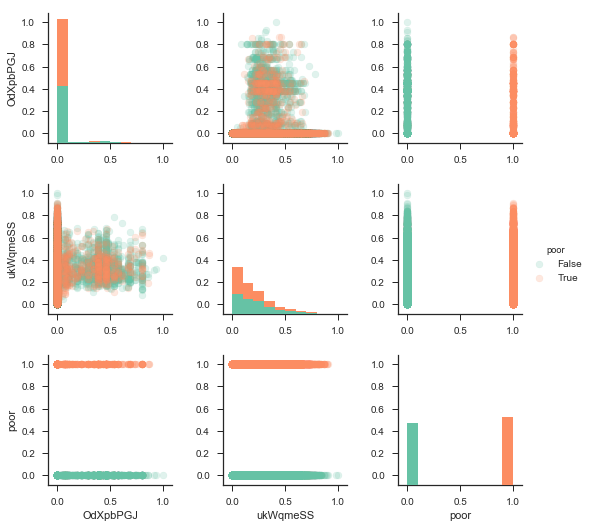

In [61]:
import seaborn as sns
sns.set(style="ticks")

g=sns.PairGrid(ias, hue="poor",palette="Set2")
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter, alpha=0.2)
a=g.add_legend()
# Numerical Plot of ia data relationships

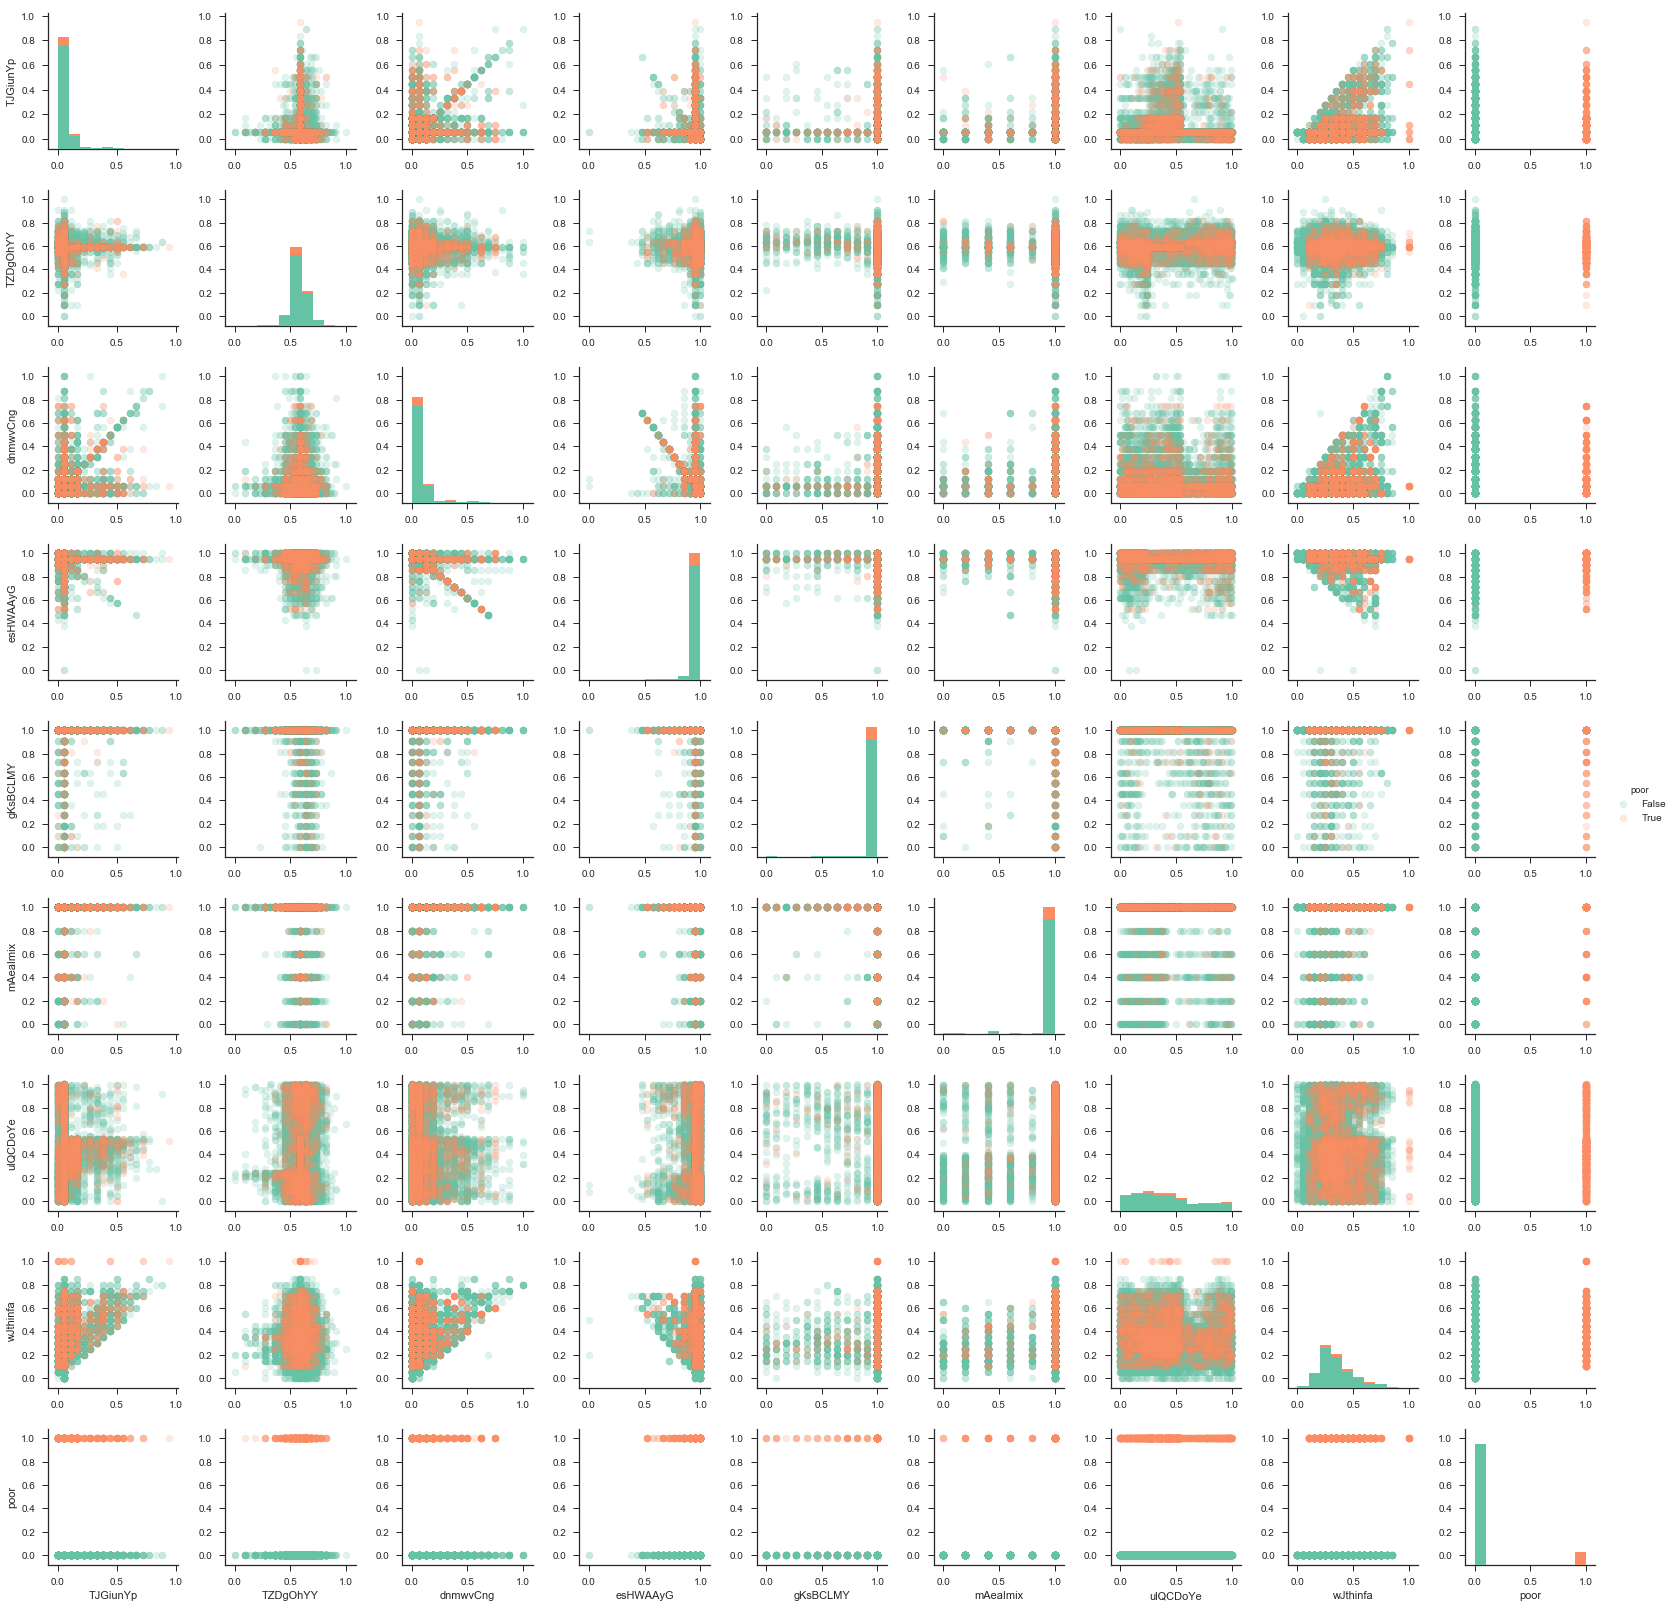

In [62]:
g=sns.PairGrid(ibs, hue="poor",palette="Set2")
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter, alpha=0.2)
b=g.add_legend()
# numerial plot of ib data relationships

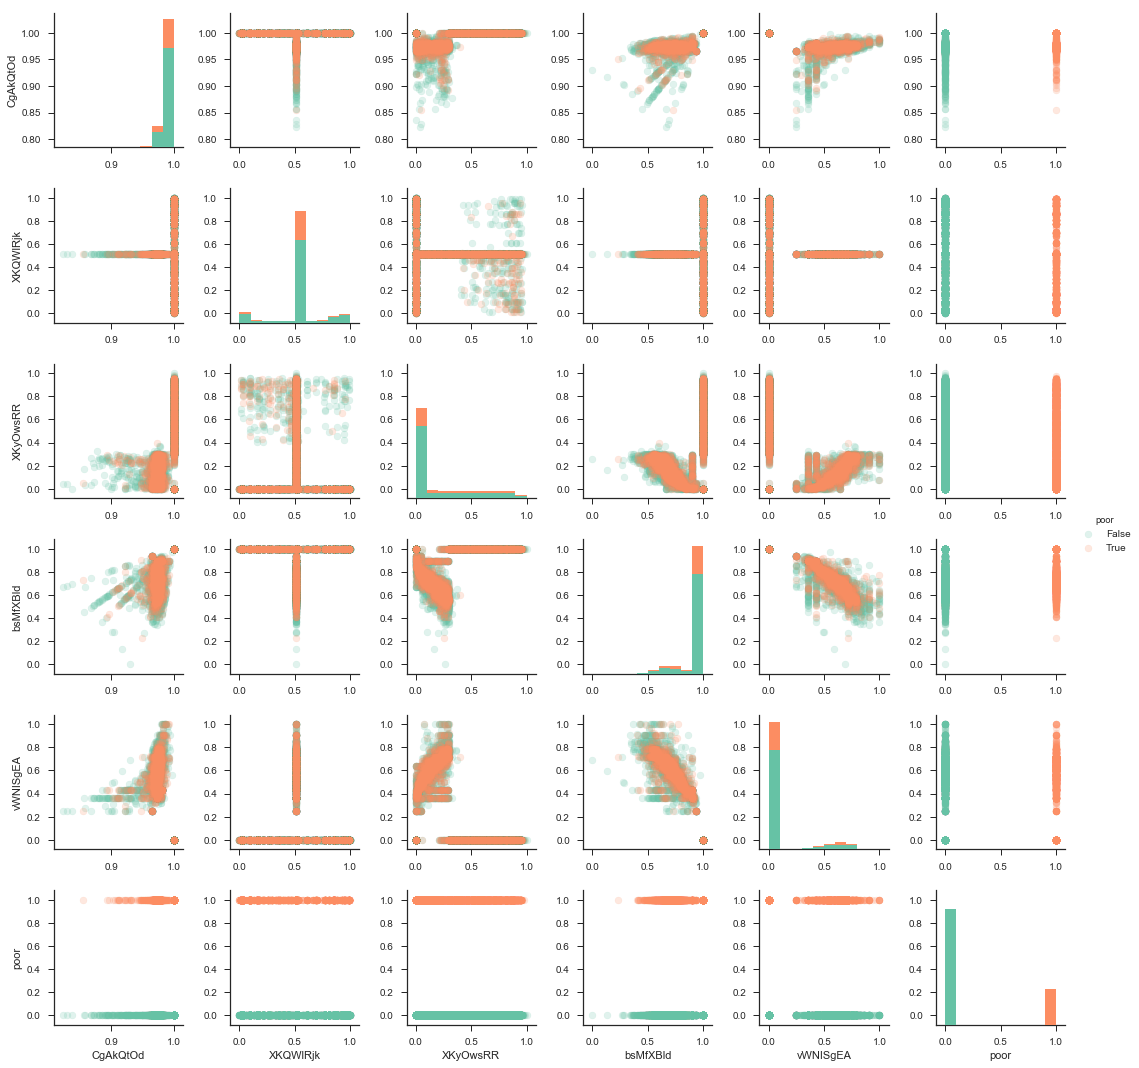

In [63]:
g=sns.PairGrid(ics, hue="poor",palette="Set2")
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter, alpha=0.2)
c=g.add_legend()
# Numerical plot of ic data relationships

In [64]:
iacat=jia.select_dtypes(include=[object,bool])
ibcat=jib.select_dtypes(include=[object,bool])
iccat=jic.select_dtypes(include=[object,bool])
iacat.head()

AQpdiRUz AjYsrafY AoLwmlEH CRLlSiFu CaukPfUC FPQrjGnS GNaMafZC  \
id    iid                                                                  
80389 1      SowpV    kVYrO    XNPgB    dpMMl    mOlYV    scxJu    sitaC   
      2      SowpV    OLBHI    XNPgB    SjaWF    mOlYV    scxJu    sitaC   
      3      QjTos    OLBHI    vSaJn    ndArQ    mOlYV    bJTYb    sitaC   
      4      nUKzL    OLBHI    vSaJn    ndArQ    yAyAe    bJTYb    sitaC   
39883 1      SowpV    sqnlK    OeQKE    SjaWF    mOlYV    scxJu    sitaC   

          HeUgMnzF KsFoQcUV MUrHEJeh   ...    kvMGuSDN nLUXHpZr   poor  \
id    iid                              ...                               
80389 1      XJsPz    kpkiH    qmOVd   ...       vtkRP    CneHb   True   
      2      XJsPz    HgfUG    qmOVd   ...       Qydia    CneHb   True   
      3      TRFeI    HgfUG    qmOVd   ...       Qydia    CneHb   True   
      4      XJsPz    HgfUG    mEGPl   ...       Qydia    vvXmD   True   
39883 1      XJsPz    kpkiH    qmOVd   ...       Qydia    CneHb  False   

          qYRZCuJD qqVibbSA rFpoTXAq rQWIpTiG tbgZsPXD xqUooaNJ zTLPJYTw  
id    iid                                                                 
80389 1      fohru    QQdHS    Hikoa    xUYIC    yOwsR    dSJoN    VneGw  
      2      fohru    QQdHS    Hikoa    xUYIC    yOwsR    JTCKs    VneGw  
      3      oEref    QQdHS    Hikoa    rkLqZ    yOwsR    JTCKs    zncPX  
      4      fohru    QQdHS    Hikoa    jVHyH    yOwsR    JTCKs    rXEFU  
39883 1      fohru    QQdHS    Hikoa    xUYIC    yOwsR    UaIsy    VneGw  

[5 rows x 40 columns]

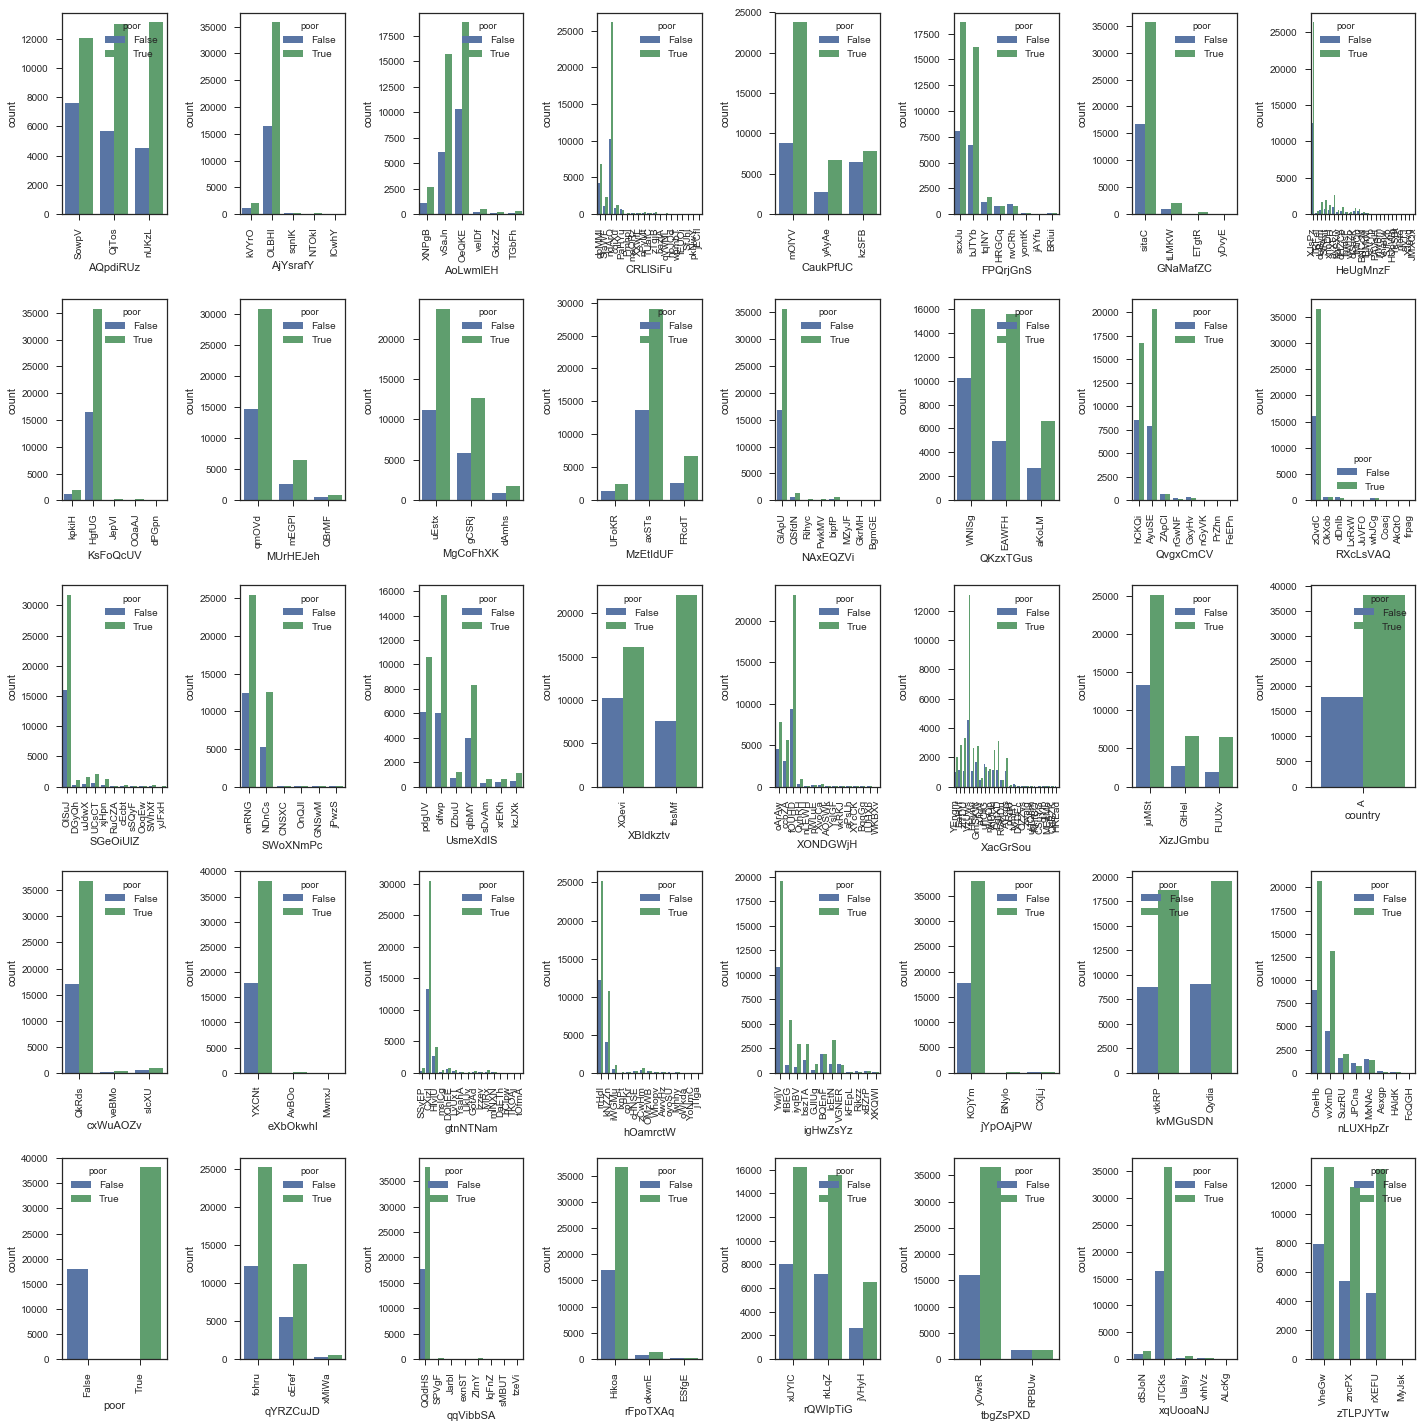

In [65]:
columns=iacat.columns
#len=len(iacat.columns)
plot=0


fig=plt.figure(figsize=[20,20])
plt.tight_layout()
for col in columns:
    plot = plot + 1
    plt.subplot(5,8,plot)
    ax=sns.countplot(x=col,hue='poor',data=iacat)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
fig.savefig(os.path.join(path,'Individual_A_catagorical_count_plots'))
    

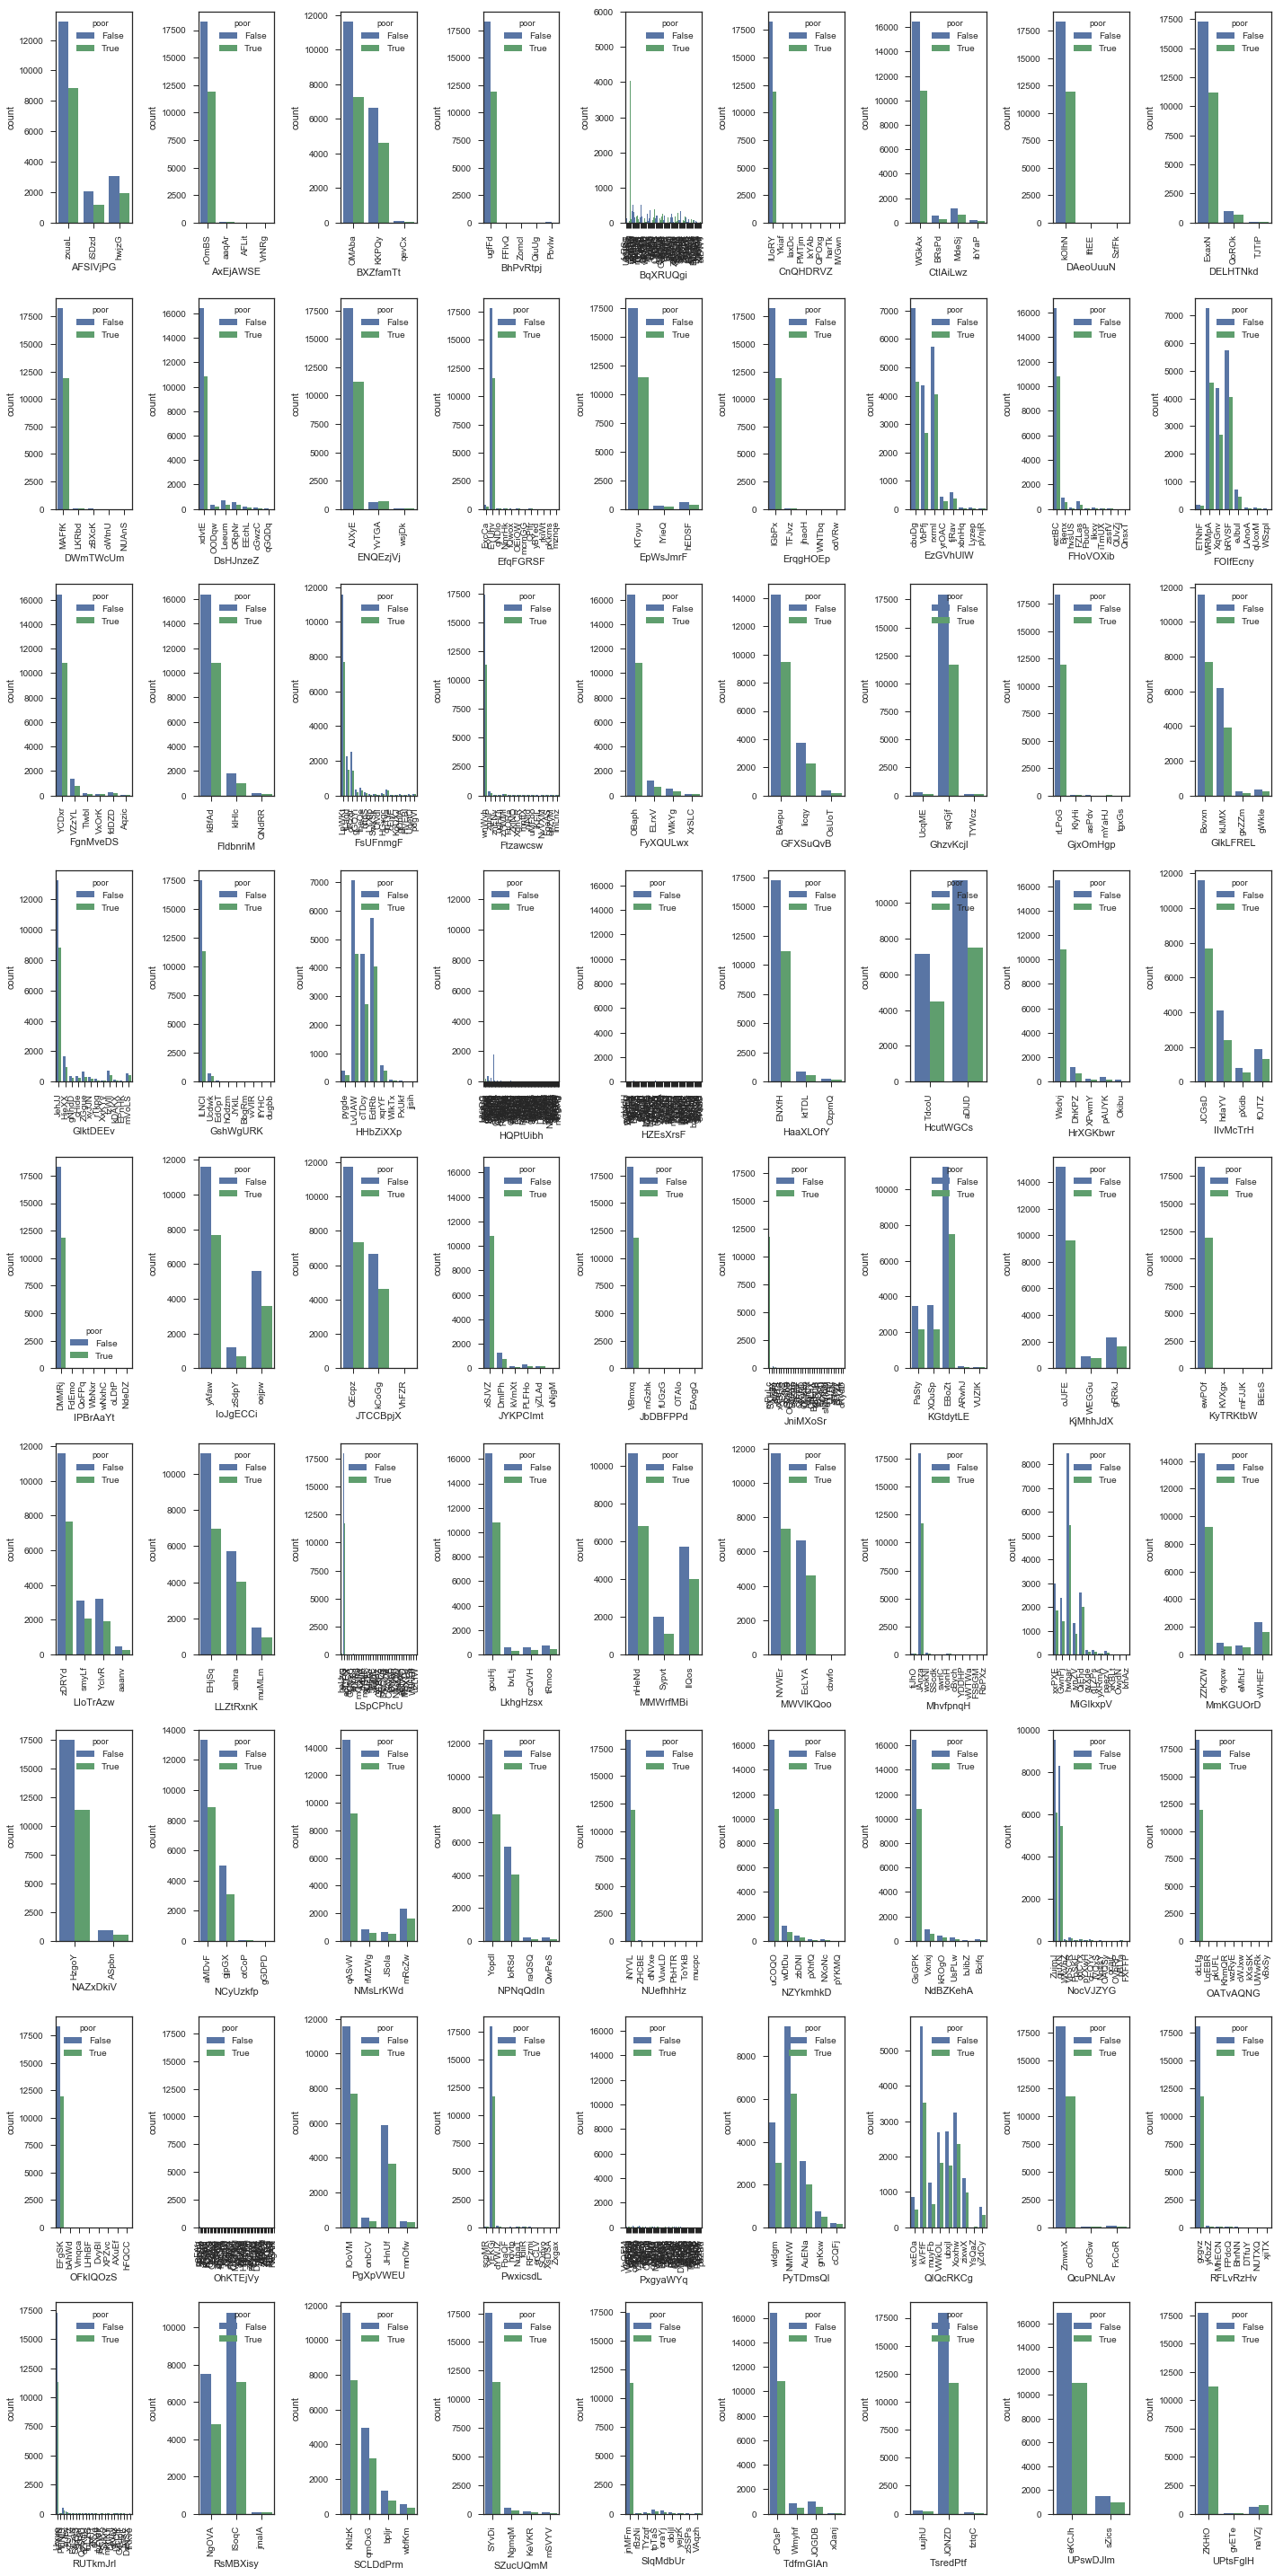

In [66]:

columns=ibcat.iloc[:,0:81].columns
#len=len(iacat.columns)
plot=0


fig=plt.figure(figsize=[20,40])
plt.tight_layout()
for col in columns:
    plot = plot + 1
    plt.subplot(9,9,plot)
    ax=sns.countplot(x=col,hue='poor',data=ibcat)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
fig.savefig(os.path.join(path,'Individual_B_catagorical_count_plots_0-81'))

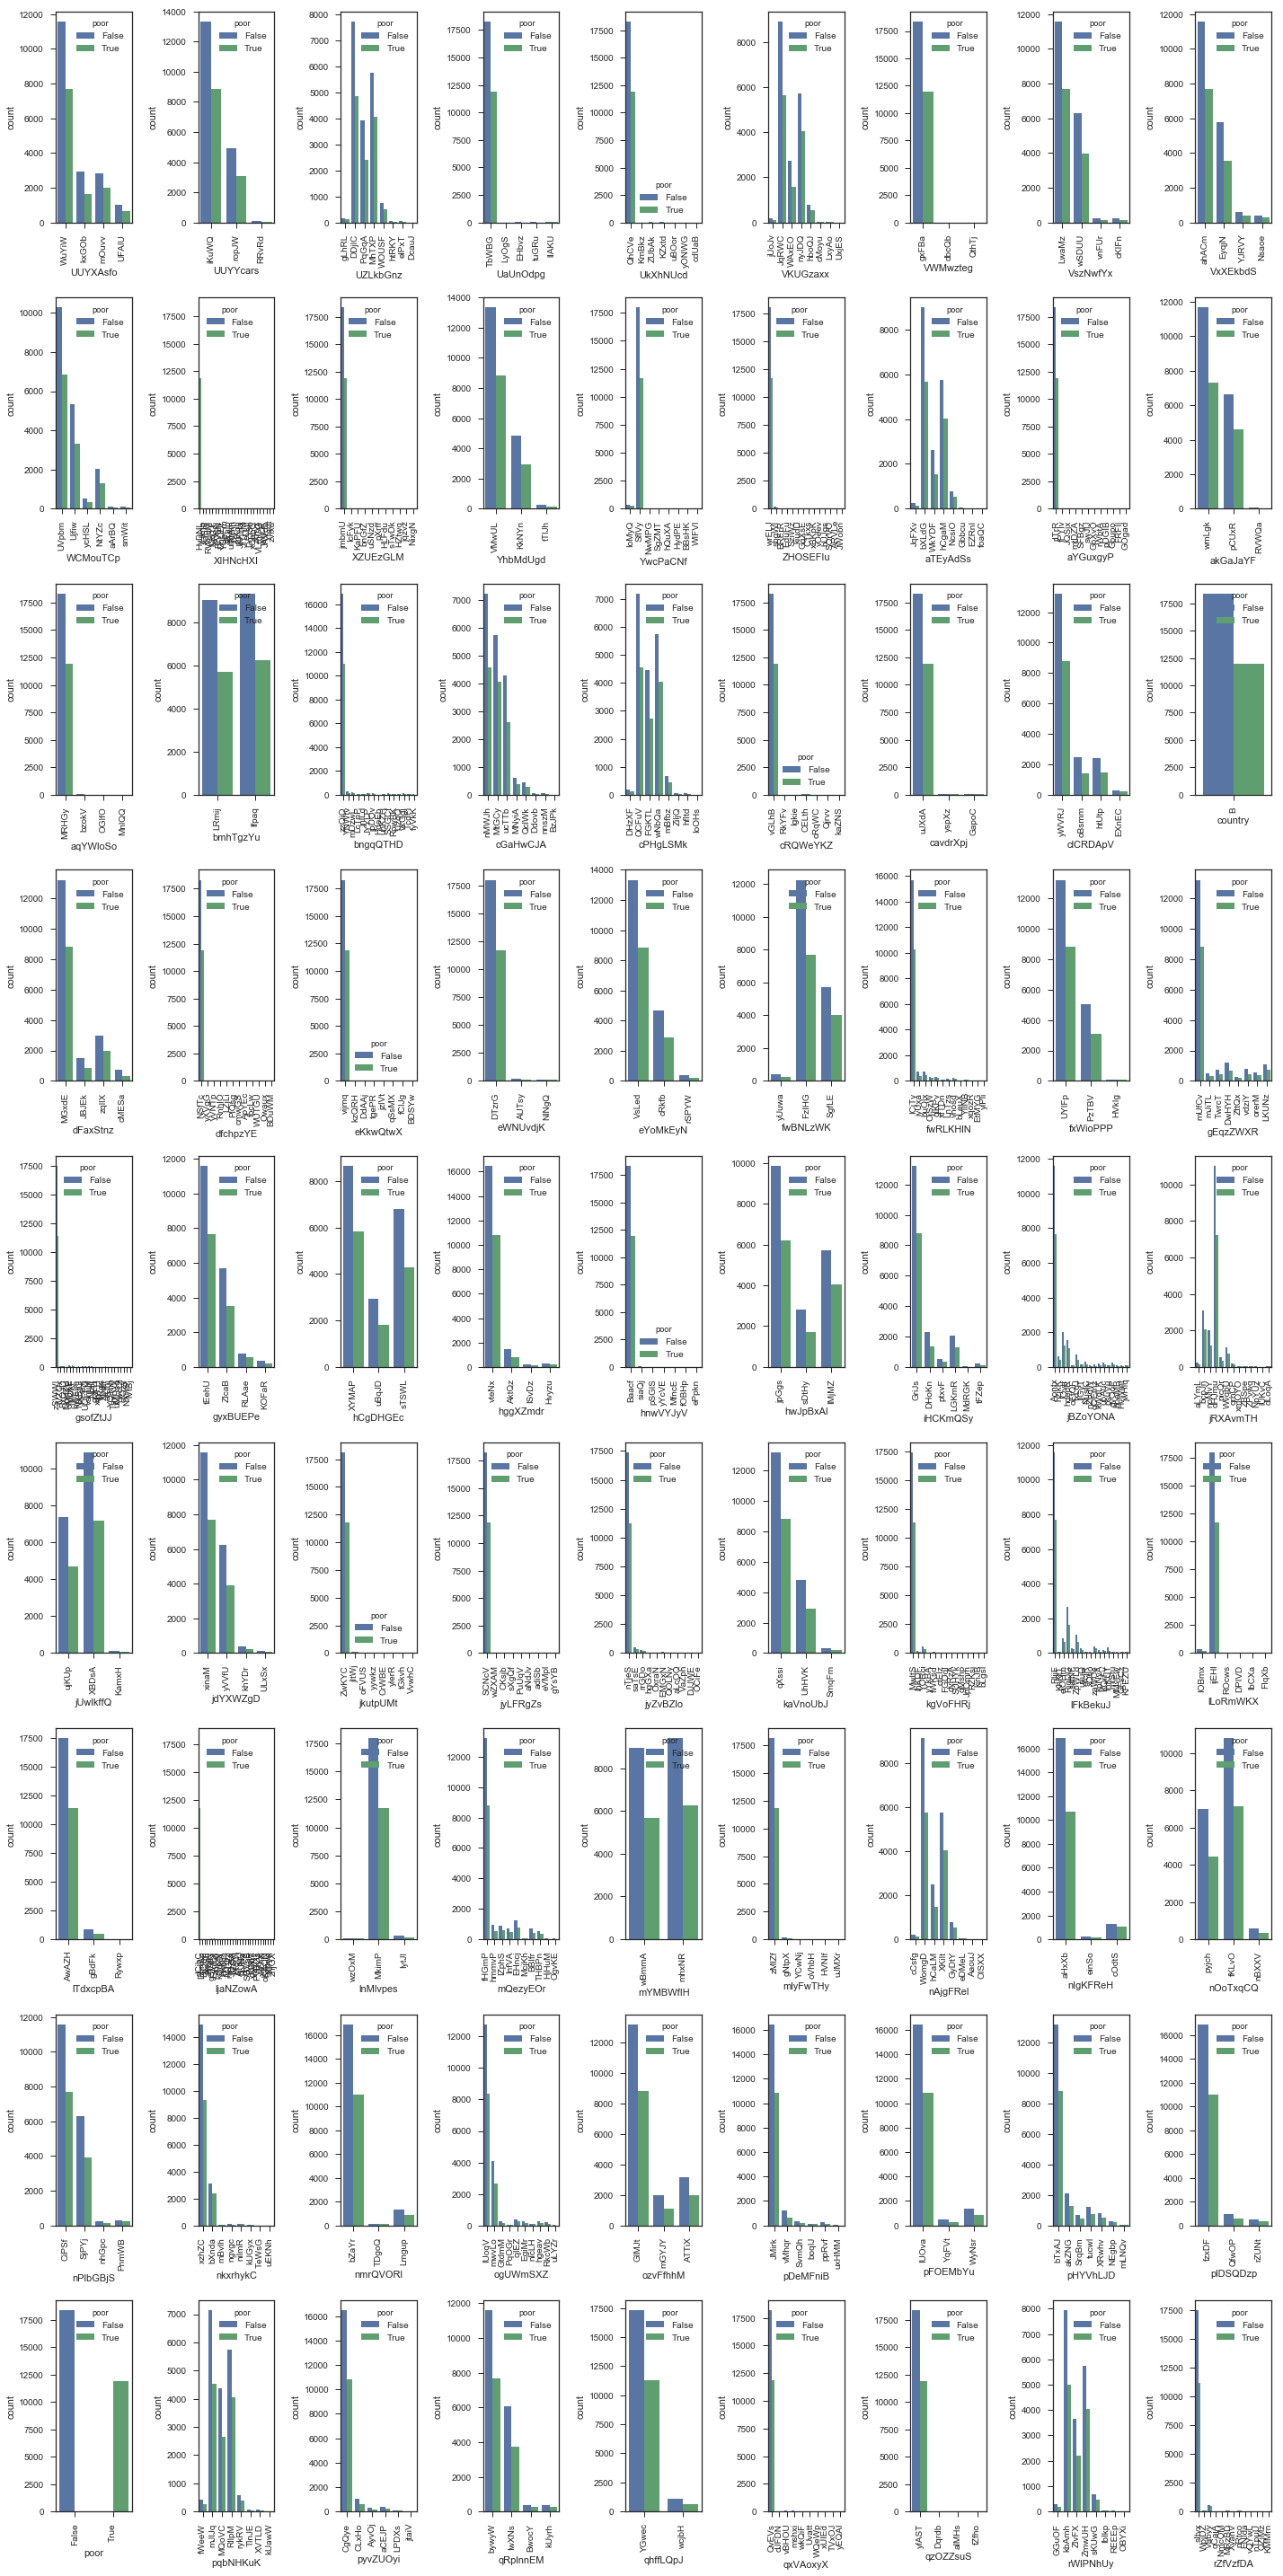

In [67]:
columns=ibcat.iloc[:,81:162].columns
plot=0
fig=plt.figure(figsize=[20,40])
plt.tight_layout()
for col in columns:
    plot = plot + 1
    plt.subplot(9,9,plot)
    ax=sns.countplot(x=col,hue='poor',data=ibcat)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    
fig.savefig(os.path.join(path,'Individual_B_catagorical_count_plots_82-162'))

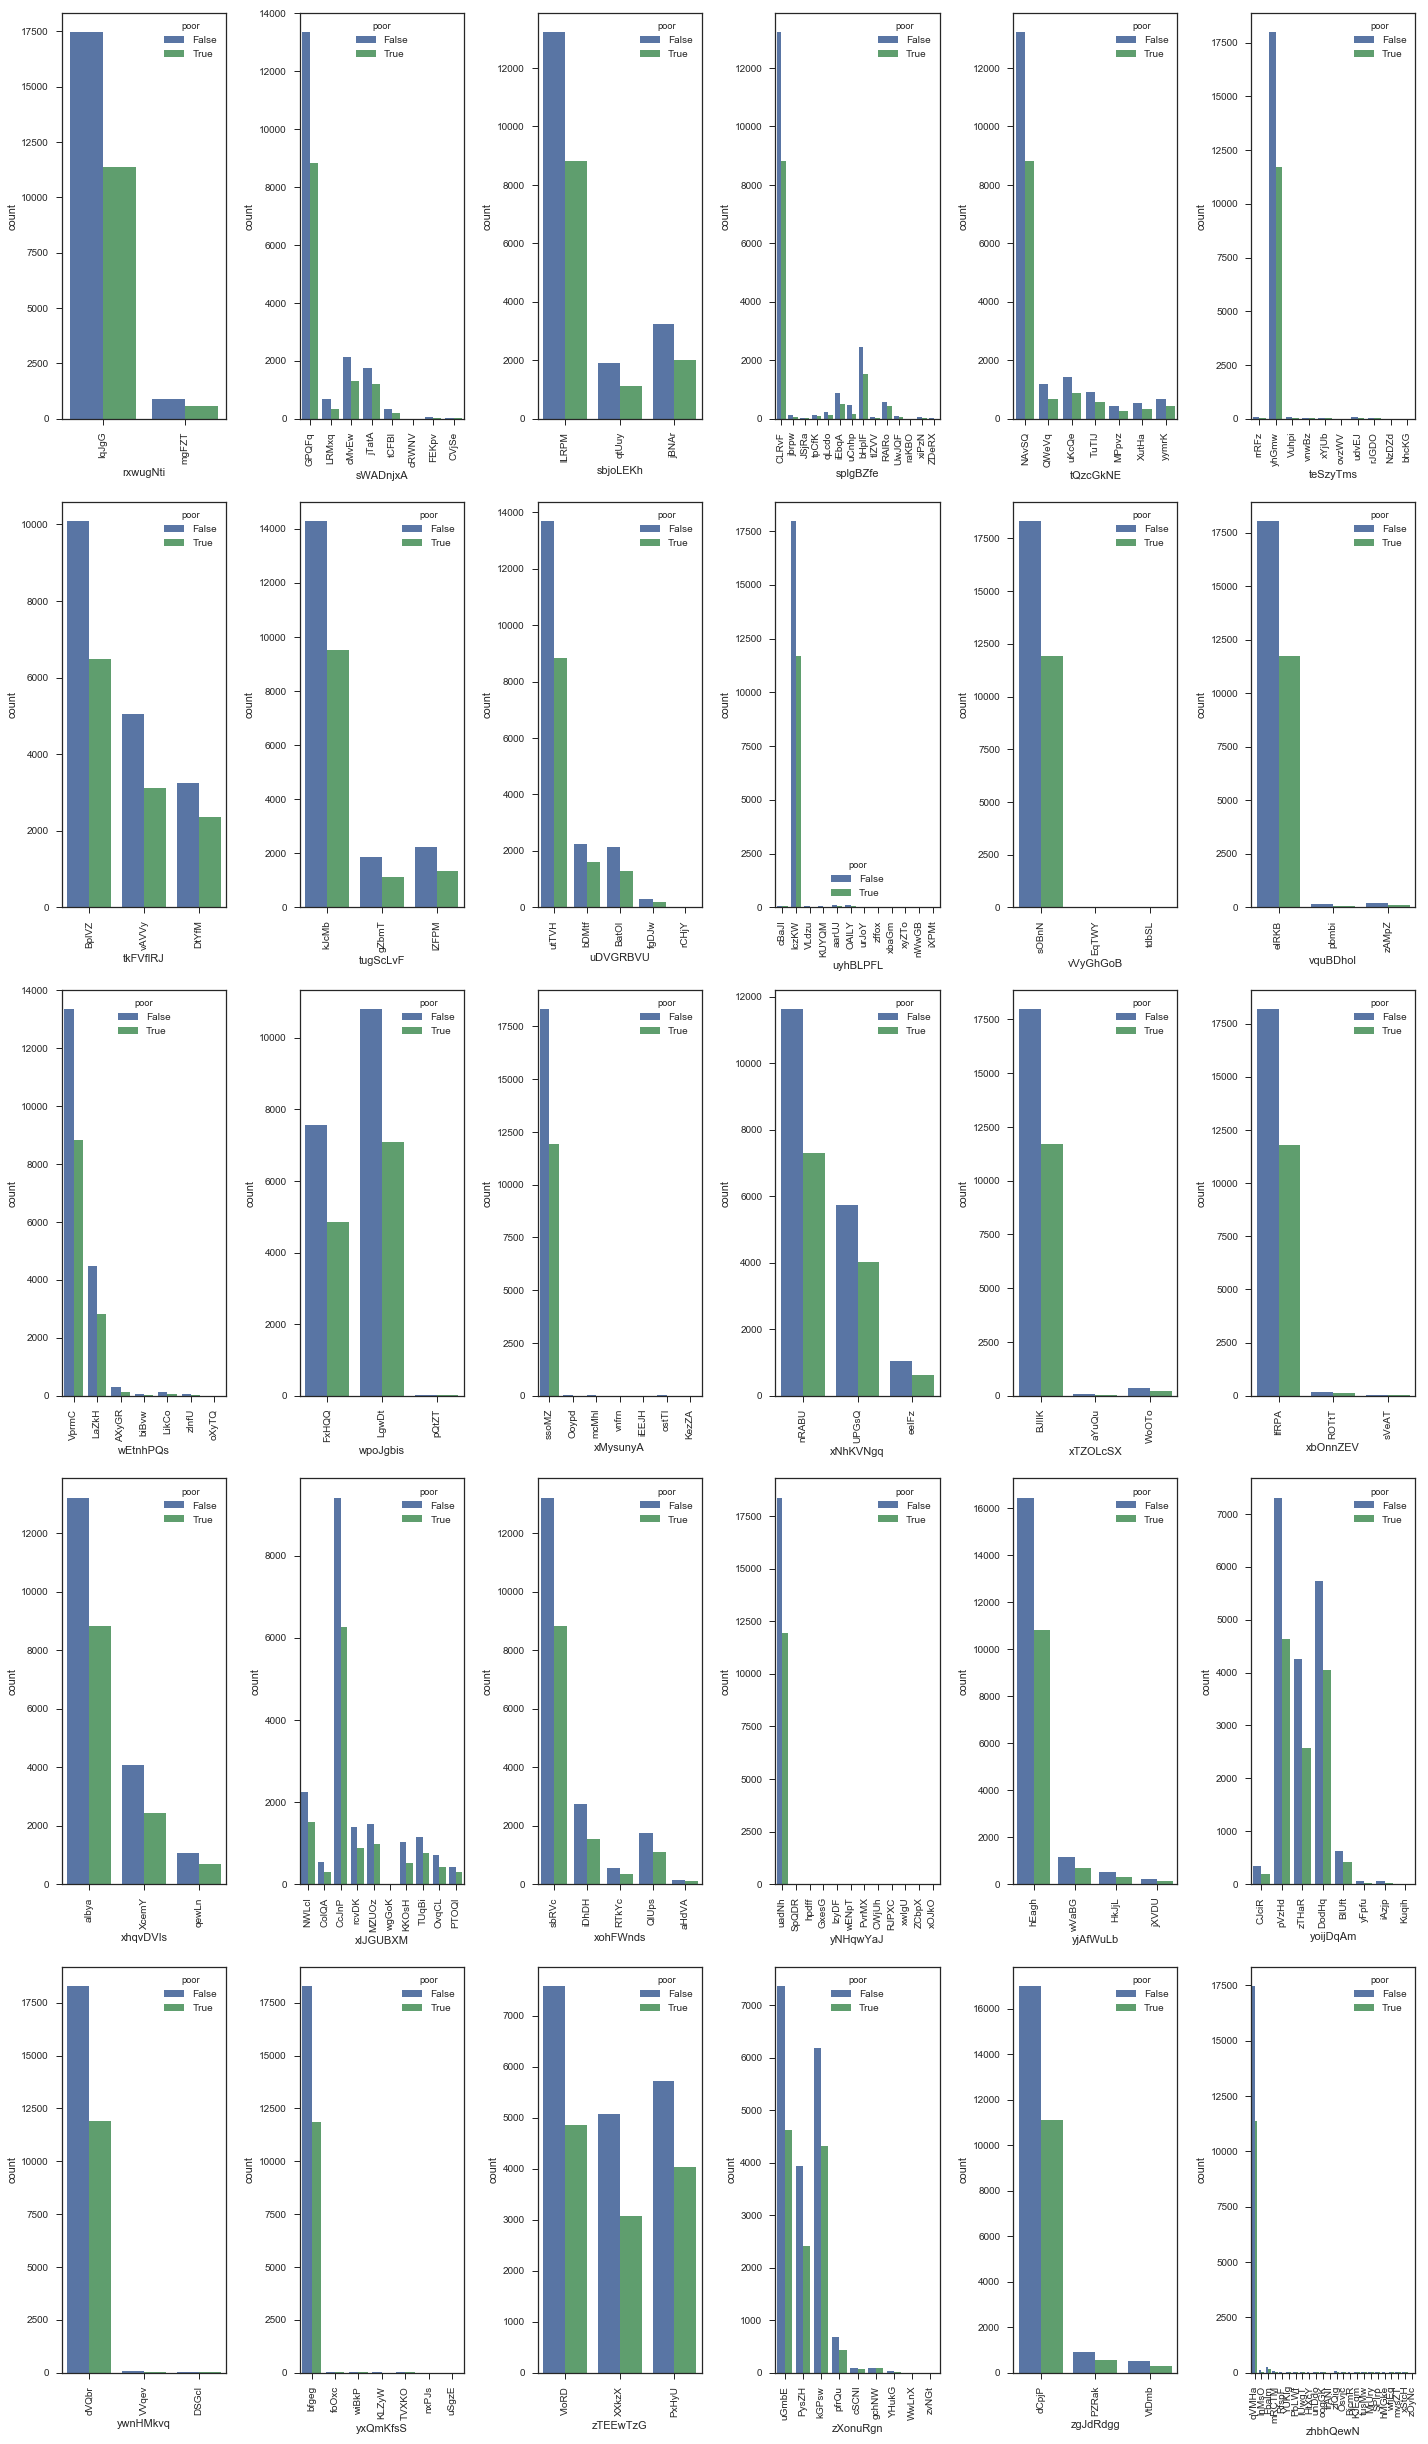

In [68]:
columns=ibcat.iloc[:,162:-1].columns
plot=0
fig=plt.figure(figsize=[20,40])
plt.tight_layout()
for col in columns:
    plot = plot + 1
    plt.subplot(6,6,plot)
    ax=sns.countplot(x=col,hue='poor',data=ibcat)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    
fig.savefig(os.path.join(path,'Individual_B_catagorical_count_plots_163-193'))

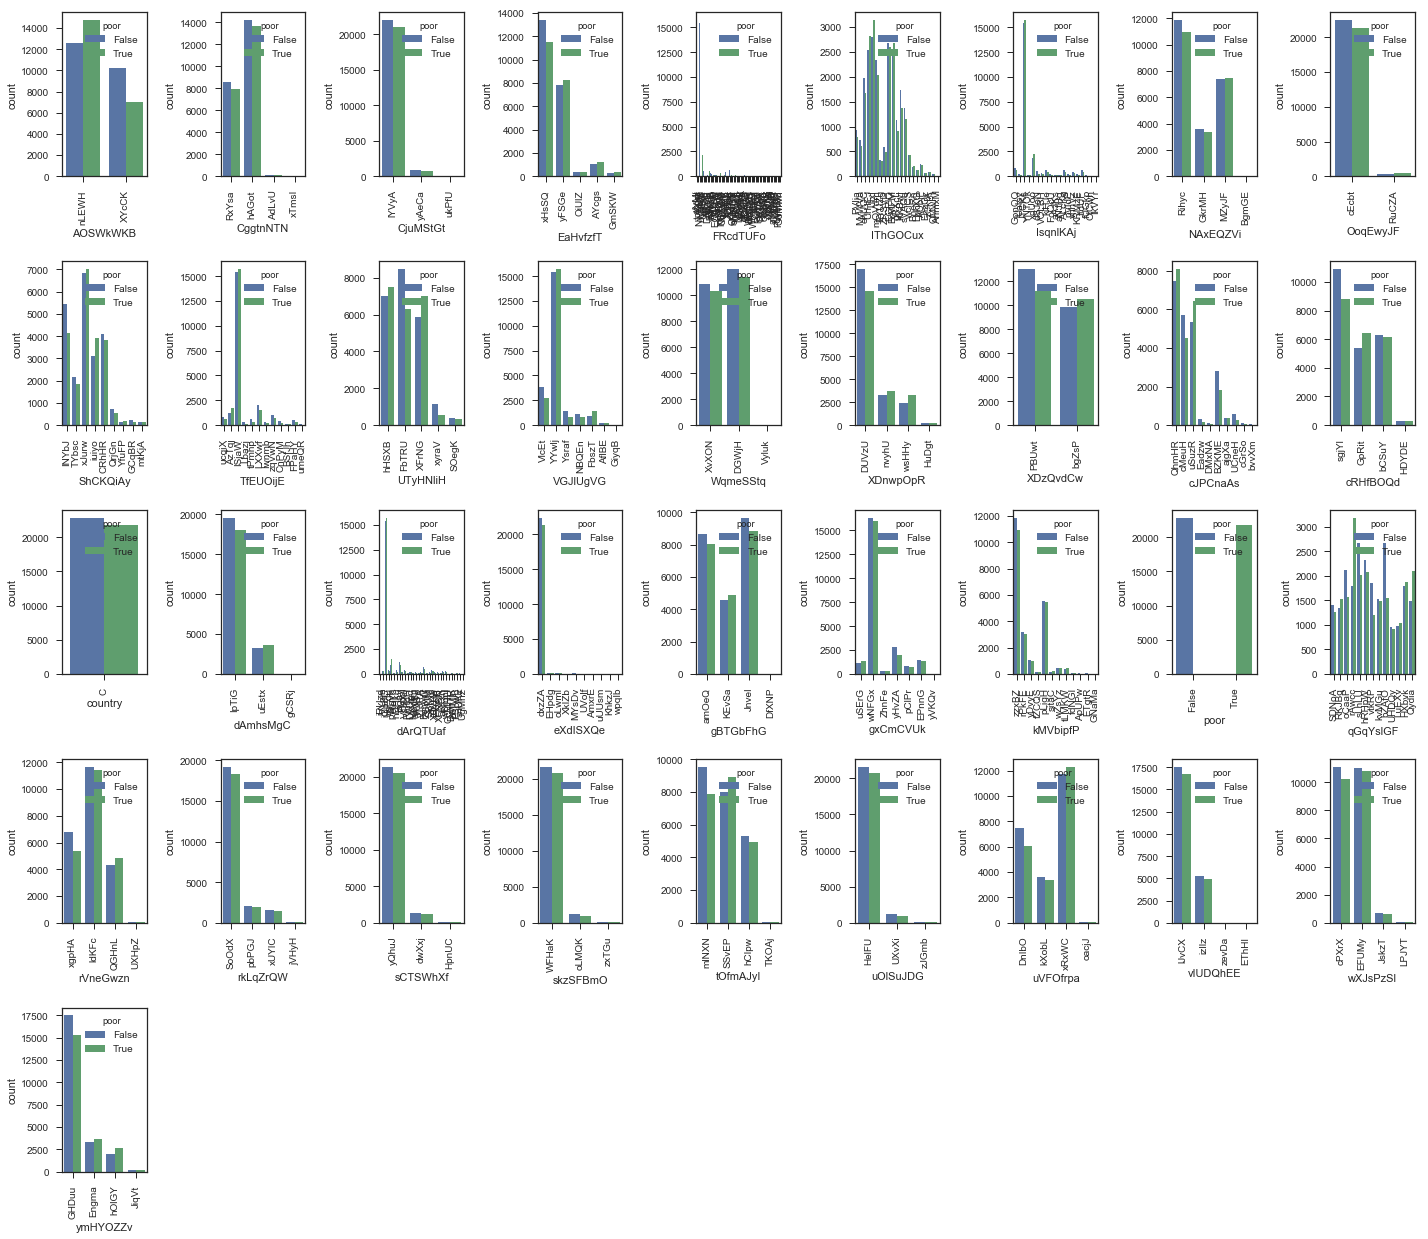

In [69]:
columns=iccat.columns

plot=0


fig=plt.figure(figsize=[20,20])
plt.tight_layout()
for col in columns:
    plot = plot + 1
    plt.subplot(6,9,plot)
    ax=sns.countplot(x=col,hue='poor',data=iccat)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
fig.savefig(os.path.join(path,'Individual_C_catagorical_count_plots'))
    

# Start from here to try a new model

In [70]:
# this is the list of columns that look like they have a correlation with the Poor lable.
ianum_picked =['OdXpbPGJ','ukWqmeSS']
iacat_picked =['AQpdiRUz','CaukPfUC','FPQrjGnS','QKzxTGus','XBldkztv','nLUXHpZr','tbgZsPXD','zTLPJYTw']
#this is the resulting unprocessed DF
#jia_picked = jia[ianum_picked+iacat_picked]
# TOGGLE between the line below and above for Individual feature selection 
jia_picked = jia.drop(['poor'],axis=1)

ibnum_picked =['TJGiunYp','TZDgOhYY','dnmwvCng','esHWAAyG','gKsBCLMY','mAeaImix','ulQCDoYe','wJthinfa']
ibcat_picked =['ENQEzjVj','UUYXAsfo','nIgKFReH','nkxrhykC']
#this is the resulting unprocessed DF
#jib_picked = jib[ibnum_picked+ibcat_picked]
# TOGGLE between the line below and above for Individual feature selection 
jib_picked= jib.drop(['poor'],axis=1)

icnum_picked =['CgAkQtOd','XKQWlRjk','XKyOwsRR','bsMfXBld','vWNISgEA']
iccat_picked = ['AOSWkWKB','EaHvfzfT','NAxEQZVi','UTyHNliH','XDnwpOpR','XDzQvdCw','dAmhsMgC','rVneGwzn','ymHYOZZv']
#this is the resulting unprocessed DF
#jic_picked = jic[icnum_picked+iccat_picked]
# TOGGLE between the line below and above for Individual feature selection 
jic_picked = jic.drop(['poor'],axis=1)

In [71]:
#one hot encode the values 
ohe_ia_picked=pd.get_dummies(jia_picked)
ohe_ib_picked=pd.get_dummies(jib_picked)
ohe_ic_picked=pd.get_dummies(jic_picked)


In [72]:
# group the values by taking the Max value for each household
ohe_ia_grouped=ohe_ia_picked.groupby('id').min()
ohe_ib_grouped=ohe_ib_picked.groupby('id').min()
ohe_ic_grouped=ohe_ic_picked.groupby('id').min()

In [73]:
#fill empty cells with the median value for that column
Xia_grouped=ohe_ia_grouped.fillna(ohe_ia_grouped.median())

Xib_grouped=ohe_ib_grouped.fillna(ohe_ib_grouped.median())
Xic_grouped=ohe_ic_grouped.fillna(ohe_ic_grouped.median())


In [74]:
Xa_to_fit= Xhas.join(Xia_grouped, lsuffix='_Xhas',rsuffix='_Xia_grouped')
Xb_to_fit= Xhbs.join(Xib_grouped, lsuffix='_Xhbs',rsuffix='_Xib_grouped')
Xc_to_fit= Xhcs.join(Xic_grouped, lsuffix='_Xhcs',rsuffix='_Xic_grouped')

Xa_to_fit=Xa_to_fit.fillna(Xa_to_fit.median())
Xb_to_fit=Xb_to_fit.fillna(Xb_to_fit.median())
Xc_to_fit=Xc_to_fit.fillna(Xc_to_fit.median())



In [75]:
# THESE ARE THE VALUES THAT NEED TO BE FEED INTO THE MODEL TO PREDICT THE VALUES FOR SUBMISSION
tXa_to_fit= tXhas.join(Xia_grouped, lsuffix='_Xhas',rsuffix='_Xia_grouped')
tXb_to_fit= tXhbs.join(Xib_grouped, lsuffix='_Xhbs',rsuffix='_Xib_grouped')
tXc_to_fit= tXhcs.join(Xic_grouped, lsuffix='_Xhcs',rsuffix='_Xic_grouped')

tXa_to_fit=tXa_to_fit.fillna(Xa_to_fit.median())
tXb_to_fit=tXb_to_fit.fillna(Xb_to_fit.median())
tXc_to_fit=tXc_to_fit.fillna(Xc_to_fit.median())

In [76]:
Xib_grouped.info()
display(jia.head())
Xhbs.info()
Xb_to_fit.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4859 entries, 17 to 99979
Columns: 1676 entries, TJGiunYp to zuvYUDSL_phonp
dtypes: float64(4), int64(4), uint8(1668)
memory usage: 8.2 MB


AQpdiRUz AjYsrafY AoLwmlEH CRLlSiFu CaukPfUC FPQrjGnS GNaMafZC  \
id    iid                                                                  
80389 1      SowpV    kVYrO    XNPgB    dpMMl    mOlYV    scxJu    sitaC   
      2      SowpV    OLBHI    XNPgB    SjaWF    mOlYV    scxJu    sitaC   
      3      QjTos    OLBHI    vSaJn    ndArQ    mOlYV    bJTYb    sitaC   
      4      nUKzL    OLBHI    vSaJn    ndArQ    yAyAe    bJTYb    sitaC   
39883 1      SowpV    sqnlK    OeQKE    SjaWF    mOlYV    scxJu    sitaC   

          HeUgMnzF KsFoQcUV MUrHEJeh   ...    nLUXHpZr   poor qYRZCuJD  \
id    iid                              ...                               
80389 1      XJsPz    kpkiH    qmOVd   ...       CneHb   True    fohru   
      2      XJsPz    HgfUG    qmOVd   ...       CneHb   True    fohru   
      3      TRFeI    HgfUG    qmOVd   ...       CneHb   True    oEref   
      4      XJsPz    HgfUG    mEGPl   ...       vvXmD   True    fohru   
39883 1      XJsPz    kpkiH    qmOVd   ...       CneHb  False    fohru   

           qqVibbSA rFpoTXAq rQWIpTiG tbgZsPXD ukWqmeSS xqUooaNJ zTLPJYTw  
id    iid                                                                  
80389 1       QQdHS    Hikoa    xUYIC    yOwsR      181    dSJoN    VneGw  
      2       QQdHS    Hikoa    xUYIC    yOwsR      141    JTCKs    VneGw  
      3       QQdHS    Hikoa    rkLqZ    yOwsR       41    JTCKs    zncPX  
      4       QQdHS    Hikoa    jVHyH    yOwsR       16    JTCKs    rXEFU  
39883 1       QQdHS    Hikoa    xUYIC    yOwsR      381    UaIsy    VneGw  

[5 rows x 42 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 1436 entries, BEyCyEUG to zuHLxBDH_huzcq
dtypes: float64(1436)
memory usage: 35.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 3112 entries, BEyCyEUG to zuvYUDSL_phonp
dtypes: float64(1440), int64(4), uint8(1668)
memory usage: 41.1 MB


In [77]:
# for sone reason the test data has already been droped from the dat frames - i'm sure this will bite us later but for now..
# Separate out the data
#tXa_to_fit=Xa_to_fit.loc[tha_index]
#tXb_to_fit=Xb_to_fit.loc[thb_index]
#tXc_to_fit=Xc_to_fit.loc[thc_index]


#Xa_to_fit=Xa_to_fit.drop(tha_index,axis=0)
#Xb_to_fit=Xb_to_fit.drop(thb_index,axis=0)
#Xc_to_fit=Xc_to_fit.drop(thc_index,axis=0)



In [78]:
#split the data traing data set 

from sklearn.model_selection import train_test_split
trainsize=0.9
randomstate=42

X_trainha, X_testha, y_trainha, y_testha = train_test_split(Xa_to_fit,yha,train_size=trainsize,random_state=randomstate)
X_trainhb, X_testhb, y_trainhb, y_testhb = train_test_split(Xb_to_fit,yhb,train_size=trainsize,random_state=randomstate)
X_trainhc, X_testhc, y_trainhc, y_testhc = train_test_split(Xc_to_fit,yhc,train_size=trainsize,random_state=randomstate)



C:\Users\mail4\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [79]:
#let try adaboost...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

results=pd.DataFrame([],columns=['Loss', 'Max_Depth','Data_Set','Num_Estimators','Sub_Sample','Score','Cross_Val_Mean'])
lr_list=[0.2,0.1]
md_list=[3,5]
ne_list=[100,200]
ss_list=[0.4,0.6,0.8,1]
rs=100
cv=2
for lr in lr_list:
    for md in md_list:
        for ne in ne_list:
                for ss in ss_list:
                    modela = GradientBoostingClassifier(loss='deviance', n_estimators=ne, learning_rate=lr, max_depth=md, random_state=rs,max_features='auto',subsample=ss)
                    clfa = modela.fit(X_trainha,y_trainha)
                    print('Ha score: ',clfa.score(X_testha,y_testha))
                    CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
                    print("Cross validation score for Ha:\n",CE_scoresa)
                    #print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))
                    CE_mean_a=CE_scoresa.mean()
                    results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfa.score(X_testha,y_testha),'Data_Set':"A",'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_a,'Sub_Sample':ss},ignore_index=True)

                    modelb = GradientBoostingClassifier(loss='deviance',n_estimators=ne, learning_rate=lr, max_depth=md, random_state=rs,max_features='auto',subsample=ss)
                    clfb = modelb.fit(X_trainhb,y_trainhb)
                    print('\nHb score: ',clfb.score(X_testhb,y_testhb))
                    CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
                    print("Cross validation score for Hb:\n",CE_scoresb, )
                    print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))
                    CE_mean_b=CE_scoresb.mean()
                    results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfb.score(X_testhb,y_testhb),'Data_Set':"B",'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_b,'Sub_Sample':ss},ignore_index=True)

                    modelc = GradientBoostingClassifier(loss='deviance',n_estimators=ne, learning_rate=lr, max_depth=md, random_state=rs,max_features='auto',subsample=ss)
                    clfc = modelc.fit(X_trainhc,y_trainhc)
                    print('\nHc score: ',clfc.score(X_testhc,y_testhc))
                    CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
                    print("Cross validation score for Hc:\n",CE_scoresc)
                    print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))
                    CE_mean_c=CE_scoresc.mean()
                    results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfc.score(X_testhc,y_testhc),'Data_Set':"C",'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_c,'Sub_Sample':ss},ignore_index=True)
                    display(results)
results.to_csv('Tuning_results_all_the_Individ_Fields_Min_gb.csv')
        

Ha score:  0.858708891596
Cross validation score for Ha:
 [ 0.86589     0.85694934]

Hb score:  0.938650306748
Cross validation score for Hb:
 [ 0.8887372  0.8954918]
Accuracy: 0.89 (+/- 0.01)


KeyboardInterrupt: 

In [ ]:
resultsload=pd.read_csv('Tuning_results_loss_log_reg_max_featu_auto_subsampling.csv')
resultsload2=pd.read_csv('Tuning_results.csv')
resultsload3=pd.read_csv('Tuning_results_all_the_Individ_Fields_Min_gb.csv')

In [ ]:
g=sns.factorplot(x='Sub_Sample',y='Score',hue='Num_Estimators',col='Data_Set',data=results)
#h=sns.factorplot(x='Max_Depth',y='Cross_Val_Mean',hue='Loss',col='Data_Set',data=results)
#irst=sns.factorplot(x='Sub_Sample',y='Score',hue='Num_Estimators',col='Data_Set',data=resultsload3)
#first=sns.factorplot(x='Sub_Sample',y='Cross_Val_Mean',hue='Num_Estimators',col='Data_Set',data=resultsload3)
#first=sns.factorplot(x='Loss',y='Score',hue='Number_Estimators',col='Data_Set',data=resultsload2)

In [ ]:
#actual parameter that we'll use to submit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

results=pd.DataFrame([],columns=['Experiment','Loss', 'Max_Depth','Data_Set','Num_Estimators','Score','Cross_Val_Mean'])
exp='GroupBy_Sum1'
rs=100
cv=2

modela = GradientBoostingClassifier(loss='deviance', n_estimators=300, learning_rate=0.2, max_depth=2, random_state=rs,max_features='auto',subsample=0.6)
clfa = modela.fit(X_trainha,y_trainha)
print('Ha score: ',clfa.score(X_testha,y_testha))
CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
print("Cross validation score for Ha:\n",CE_scoresa)
#print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))
CE_mean_a=CE_scoresa.mean()
results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfa.score(X_testha,y_testha),'Data_Set':"A",'Num_Estimators':300, 'Cross_Val_Mean':CE_mean_a,'Experiment':exp},ignore_index=True)

modelb = GradientBoostingClassifier(loss='deviance',n_estimators=100, learning_rate=0.2, max_depth=1, random_state=rs,max_features='auto')
clfb = modelb.fit(X_trainhb,y_trainhb)
print('\nHb score: ',clfb.score(X_testhb,y_testhb))
CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
print("Cross validation score for Hb:\n",CE_scoresb, )
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))
CE_mean_b=CE_scoresb.mean()
results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfb.score(X_testhb,y_testhb),'Data_Set':"B",'Num_Estimators':100, 'Cross_Val_Mean':CE_mean_b,'Experiment':exp},ignore_index=True)

modelc = GradientBoostingClassifier(loss='deviance',n_estimators=100, learning_rate=0.2, max_depth=5, random_state=rs,max_features='auto')
clfc = modelc.fit(X_trainhc,y_trainhc)
print('\nHc score: ',clfc.score(X_testhc,y_testhc))
CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
print("Cross validation score for Hc:\n",CE_scoresc)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))
CE_mean_c=CE_scoresc.mean()
results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfc.score(X_testhc,y_testhc),'Data_Set':"C",'Num_Estimators':100, 'Cross_Val_Mean':CE_mean_c,'Experiment':exp},ignore_index=True)
total_results=total_results.append(results)

In [ ]:
#total_results=pd.DataFrame([])
total_results=total_results.drop('GroupBy_Max',axis=0)
#display(total_results)
first=sns.factorplot(x='Data_Set',y='Score',hue='Experiment',col='Loss',data=results)

total_results.to_csv('param_tuning2.csv')

In [87]:
# so the three models that have been trained are clfa,clfb and clfc

ada_model_ha =clfa
ada_model_hb =clfb
ada_model_hc =clfc

test_suba = pd.DataFrame(ada_model_ha.predict_proba(tXa_to_fit),columns=['False','True'],index=tha_index)
test_subb = pd.DataFrame(ada_model_hb.predict_proba(tXb_to_fit),columns=['False','True'],index=thb_index)
test_subc = pd.DataFrame(ada_model_hc.predict_proba(tXc_to_fit),columns=['False','True'],index=thc_index)
temp_sub=test_suba.append(test_subb).append(test_subc)

In [88]:

sub_template['poor']=temp_sub['True']

sub_template.to_csv('_submission.csv')

In [ ]:
#export processed data to be used by different model 
Xa_to_fit.to_csv('Xa_to_fit.csv')
Xb_to_fit.to_csv('Xb_to_fit.csv')
Xc_to_fit.to_csv('Xc_to_fit.csv')
tXa_to_fit.to_csv('tXa_to_fit.csv')
tXa_to_fit.to_csv('tXb_to_fit.csv')
tXc_to_fit.to_csv('tXc_to_fit.csv')

yha.to_csv('yha.csv')
yhb.to_csv('yhb.csv')
yhc.to_csv('yhc.csv')

In [ ]:
# lets try LightGBM
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

results=pd.DataFrame([],columns=['Experiment','Loss', 'Max_Depth','Data_Set','Num_Estimators','Score','Cross_Val_Mean'])
exp='GroupBy_Sum1'
rs=100
cv=2

model = GradientBoostingClassifier(loss='deviance', n_estimators=300, learning_rate=0.2, max_depth=2, random_state=rs,max_features='auto',subsample=0.6)
clfa = modela.fit(X_trainha,y_trainha)
print('Ha score: ',clfa.score(X_testha,y_testha))
CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
print("Cross validation score for Ha:\n",CE_scoresa)
#print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))
CE_mean_a=CE_scoresa.mean()
results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfa.score(X_testha,y_testha),'Data_Set':"A",'Num_Estimators':300, 'Cross_Val_Mean':CE_mean_a,'Experiment':exp},ignore_index=True)

model = GradientBoostingClassifier(loss='deviance',n_estimators=100, learning_rate=0.2, max_depth=1, random_state=rs,max_features='auto')
clfb = modelb.fit(X_trainhb,y_trainhb)
print('\nHb score: ',clfb.score(X_testhb,y_testhb))
CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
print("Cross validation score for Hb:\n",CE_scoresb, )
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))
CE_mean_b=CE_scoresb.mean()
results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfb.score(X_testhb,y_testhb),'Data_Set':"B",'Num_Estimators':100, 'Cross_Val_Mean':CE_mean_b,'Experiment':exp},ignore_index=True)

modelc = GradientBoostingClassifier(loss='deviance',n_estimators=100, learning_rate=0.2, max_depth=5, random_state=rs,max_features='auto')
clfc = modelc.fit(X_trainhc,y_trainhc)
print('\nHc score: ',clfc.score(X_testhc,y_testhc))
CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
print("Cross validation score for Hc:\n",CE_scoresc)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))
CE_mean_c=CE_scoresc.mean()
results=results.append({ 'Loss':lr,'Max_Depth':md, 'Score':clfc.score(X_testhc,y_testhc),'Data_Set':"C",'Num_Estimators':100, 'Cross_Val_Mean':CE_mean_c,'Experiment':exp},ignore_index=True)
total_results=total_results.append(results)

In [ ]:
from lightgbm import LGBMClassifier as LGBC
from sklearn.model_selection import cross_val_score
modelb= LGBC(boosting_type='gbdt', num_leaves=31, max_depth=5, learning_rate=0.01, n_estimators=1000, subsample_for_bin=2000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=0.8, subsample_freq=1, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True)


In [80]:
#let try Light...
from lightgbm import LGBMClassifier as LGBC
from sklearn.model_selection import cross_val_score

results=pd.DataFrame([],columns=['Algorithm','Loss', 'Max_Depth','Max_Leafs','Data_Set','Num_Estimators',
                                 'Sub_Sample','Score','Cross_Val_Mean'])
lr_list=[0.2,0.1]
md_list=[-1]
ne_list=[100,200,300]
ss_list=[1]
ml_list=[20,30,40,50,60,70,80,90]
ba_list=['goss','gbdt','dart']
rs=100
cv=2

for lr in lr_list:
    for md in md_list:
        for ml in ml_list:
            for ss in ss_list:
                for ba in ba_list:
                     for ne in ne_list:
                            Params = {
                                          'num_leaves':31,
                                          'max_depth':md,
                                          'learning_rate':lr,
                                          'n_estimators':ne,
                                          'subsample_for_bin':2000,
                                          'objective':None,
                                          'class_weight':None,
                                          'min_split_gain':0.0,
                                          'min_child_weight':0.001,
                                          'min_child_samples':20,
                                          'subsample':ss,
                                          'subsample_freq':1,
                                          'colsample_bytree':1.0,
                                          'reg_alpha':0.0,
                                          'reg_lambda':0.0,
                                          'random_state':rs,
                                          'n_job':-1, 
                                          'silent':True
                            }
                            modela = LGBC(boosting_type=ba, num_leaves=ml, max_depth=md, learning_rate=lr, n_estimators=ne, subsample_for_bin=2000,
                                          objective='binary', class_weight='balanced', min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,
                                          subsample=ss, subsample_freq=1, colsample_bytree=1, reg_alpha=0.0, reg_lambda=0.0, random_state=None,
                                          n_jobs=-1, silent=True)
                            clfa = modela.fit(X_trainha,y_trainha)
                            print('Ha score: ',clfa.score(X_testha,y_testha))
                            CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
                            print("Cross validation score for Ha:\n",CE_scoresa)
                            #print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))
                            CE_mean_a=CE_scoresa.mean()
                            results=results.append({'Algorithm':ba,'Max_Leafs':ml, 'Loss':lr,'Max_Depth':md, 'Score':clfa.score(X_testha,y_testha),'Data_Set':"A",
                                                    'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_a,'Sub_Sample':ss},ignore_index=True)

                            modelb = LGBC(boosting_type=ba, num_leaves=ml, max_depth=md, learning_rate=lr, n_estimators=ne, subsample_for_bin=2000,
                                          objective='binary', class_weight='balanced', min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,
                                          subsample=ss, subsample_freq=1, colsample_bytree=1, reg_alpha=0.0, reg_lambda=0.0, random_state=None,
                                          n_jobs=-1, silent=True)

                            clfb = modelb.fit(X_trainhb,y_trainhb)
                            print('\nHb score: ',clfb.score(X_testhb,y_testhb))
                            CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
                            print("Cross validation score for Hb:\n",CE_scoresb, )
                            print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))
                            CE_mean_b=CE_scoresb.mean()
                            results=results.append({'Algorithm':ba,'Max_Leafs':ml, 'Loss':lr,'Max_Depth':md, 'Score':clfb.score(X_testhb,y_testhb),'Data_Set':"B",
                                                    'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_b,'Sub_Sample':ss},ignore_index=True)

                            modelc = LGBC(boosting_type=ba, num_leaves=ml, max_depth=md, learning_rate=lr, n_estimators=ne, subsample_for_bin=2000,
                                          objective='binary', class_weight='balanced', min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,
                                          subsample=ss, subsample_freq=1, colsample_bytree=1, reg_alpha=0.0, reg_lambda=0.0, random_state=None,
                                          n_jobs=-1, silent=True)

                            clfc = modelc.fit(X_trainhc,y_trainhc)
                            print('\nHc score: ',clfc.score(X_testhc,y_testhc))
                            CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
                            print("Cross validation score for Hc:\n",CE_scoresc)
                            print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))
                            CE_mean_c=CE_scoresc.mean()
                            results=results.append({'Algorithm':ba,'Max_Leafs':ml,'Loss':lr,'Max_Depth':md, 'Score':clfc.score(X_testhc,y_testhc),'Data_Set':"C",
                                                'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_c,'Sub_Sample':ss},ignore_index=True)
        display(results)
results.to_csv('21022018_Tuning_results_LGBC.csv')
        

Ha score:  0.864799025579
Cross validation score for Ha:
 [ 0.86155513  0.86832837]

Hb score:  0.932515337423
Cross validation score for Hb:
 [ 0.90375427  0.91530055]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99141189  0.99381656]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.863580998782
Cross validation score for Ha:
 [ 0.86101328  0.87266323]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90716724  0.91530055]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.996908809892
Cross validation score for Hc:
 [ 0.99141189  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.866017052375
Cross validation score for Ha:
 [ 0.86480629  0.86724465]

Hb score:  0.950920245399
Cross validation score for Hb:
 [ 0.90921502  0.91598361]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.867235079172
Cross validation score for Ha:
 [ 0.86372257  0.86805744

Ha score:  0.861144945189
Cross validation score for Ha:
 [ 0.86020049  0.86020049]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90921502  0.91530055]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99141189  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.858708891596
Cross validation score for Ha:
 [ 0.86345164  0.86697372]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90853242  0.91871585]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.863580998782
Cross validation score for Ha:
 [ 0.86561907  0.86534814]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.9112628   0.91871585]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.861144945189
Cross validation score for Ha:
 [ 0.85992956  0.86507721

Ha score:  0.861144945189
Cross validation score for Ha:
 [ 0.86236792  0.8639935 ]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90716724  0.91461749]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99141189  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.855054811206
Cross validation score for Ha:
 [ 0.86778651  0.86778651]

Hb score:  0.953987730061
Cross validation score for Hb:
 [ 0.90989761  0.91803279]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.864799025579
Cross validation score for Ha:
 [ 0.86724465  0.87374695]

Hb score:  0.953987730061
Cross validation score for Hb:
 [ 0.9105802   0.92008197]
Accuracy: 0.92 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.861144945189
Cross validation score for Ha:
 [ 0.85965863  0.86074235

Algorithm  Loss Max_Depth Max_Leafs Data_Set Num_Estimators Sub_Sample  \
0        goss   0.2        -1        20        A            100          1   
1        goss   0.2        -1        20        B            100          1   
2        goss   0.2        -1        20        C            100          1   
3        goss   0.2        -1        20        A            200          1   
4        goss   0.2        -1        20        B            200          1   
5        goss   0.2        -1        20        C            200          1   
6        goss   0.2        -1        20        A            300          1   
7        goss   0.2        -1        20        B            300          1   
8        goss   0.2        -1        20        C            300          1   
9        gbdt   0.2        -1        20        A            100          1   
10       gbdt   0.2        -1        20        B            100          1   
11       gbdt   0.2        -1        20        C            100          1   
12       gbdt   0.2        -1        20        A            200          1   
13       gbdt   0.2        -1        20        B            200          1   
14       gbdt   0.2        -1        20        C            200          1   
15       gbdt   0.2        -1        20        A            300          1   
16       gbdt   0.2        -1        20        B            300          1   
17       gbdt   0.2        -1        20        C            300          1   
18       dart   0.2        -1        20        A            100          1   
19       dart   0.2        -1        20        B            100          1   
20       dart   0.2        -1        20        C            100          1   
21       dart   0.2        -1        20        A            200          1   
22       dart   0.2        -1        20        B            200          1   
23       dart   0.2        -1        20        C            200          1   
24       dart   0.2        -1        20        A            300          1   
25       dart   0.2        -1        20        B            300          1   
26       dart   0.2        -1        20        C            300          1   
27       goss   0.2        -1        30        A            100          1   
28       goss   0.2        -1        30        B            100          1   
29       goss   0.2        -1        30        C            100          1   
..        ...   ...       ...       ...      ...            ...        ...   
186      dart   0.2        -1        80        A            300          1   
187      dart   0.2        -1        80        B            300          1   
188      dart   0.2        -1        80        C            300          1   
189      goss   0.2        -1        90        A            100          1   
190      goss   0.2        -1        90        B            100          1   
191      goss   0.2        -1        90        C            100          1   
192      goss   0.2        -1        90        A            200          1   
193      goss   0.2        -1        90        B            200          1   
194      goss   0.2        -1        90        C            200          1   
195      goss   0.2        -1        90        A            300          1   
196      goss   0.2        -1        90        B            300          1   
197      goss   0.2        -1        90        C            300          1   
198      gbdt   0.2        -1        90        A            100          1   
199      gbdt   0.2        -1        90        B            100          1   
200      gbdt   0.2        -1        90        C            100          1   
201      gbdt   0.2        -1        90        A            200          1   
202      gbdt   0.2        -1        90        B            200          1   
203      gbdt   0.2        -1        90        C            200          1   
204      gbdt   0.2        -1        90        A            300          1   
205      gbdt   0.2       

Ha score:  0.864799025579
Cross validation score for Ha:
 [ 0.86263885  0.8639935 ]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90170648  0.90368852]
Accuracy: 0.90 (+/- 0.00)

Hc score:  0.996908809892
Cross validation score for Hc:
 [ 0.99141189  0.99416008]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.863580998782
Cross validation score for Ha:
 [ 0.87076673  0.86887022]

Hb score:  0.950920245399
Cross validation score for Hb:
 [ 0.90853242  0.91325137]
Accuracy: 0.91 (+/- 0.00)

Hc score:  0.996908809892
Cross validation score for Hc:
 [ 0.99209894  0.99416008]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.855054811206
Cross validation score for Ha:
 [ 0.87293416  0.87293416]

Hb score:  0.941717791411
Cross validation score for Hb:
 [ 0.9112628   0.91256831]
Accuracy: 0.91 (+/- 0.00)

Hc score:  0.996908809892
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.863580998782
Cross validation score for Ha:
 [ 0.86345164  0.86805744

Ha score:  0.861144945189
Cross validation score for Ha:
 [ 0.86643186  0.86182606]

Hb score:  0.944785276074
Cross validation score for Hb:
 [ 0.90102389  0.90915301]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.996908809892
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.868453105968
Cross validation score for Ha:
 [ 0.8685993   0.86209699]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90648464  0.90983607]
Accuracy: 0.91 (+/- 0.00)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99347303]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.861144945189
Cross validation score for Ha:
 [ 0.86724465  0.8612842 ]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90921502  0.91188525]
Accuracy: 0.91 (+/- 0.00)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99416008]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.862362971985
Cross validation score for Ha:
 [ 0.86670279  0.86318071

Ha score:  0.867235079172
Cross validation score for Ha:
 [ 0.86236792  0.86480629]

Hb score:  0.950920245399
Cross validation score for Hb:
 [ 0.9003413   0.91120219]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.996908809892
Cross validation score for Hc:
 [ 0.99175541  0.99450361]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.856272838002
Cross validation score for Ha:
 [ 0.86101328  0.86968301]

Hb score:  0.947852760736
Cross validation score for Hb:
 [ 0.90375427  0.91256831]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99347303]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.863580998782
Cross validation score for Ha:
 [ 0.86589     0.87212138]

Hb score:  0.950920245399
Cross validation score for Hb:
 [ 0.90648464  0.91530055]
Accuracy: 0.91 (+/- 0.01)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99416008]
Accuracy: 0.99 (+/- 0.00)
Ha score:  0.863580998782
Cross validation score for Ha:
 [ 0.86453536  0.86372257

Algorithm  Loss Max_Depth Max_Leafs Data_Set Num_Estimators Sub_Sample  \
0        goss   0.2        -1        20        A            100          1   
1        goss   0.2        -1        20        B            100          1   
2        goss   0.2        -1        20        C            100          1   
3        goss   0.2        -1        20        A            200          1   
4        goss   0.2        -1        20        B            200          1   
5        goss   0.2        -1        20        C            200          1   
6        goss   0.2        -1        20        A            300          1   
7        goss   0.2        -1        20        B            300          1   
8        goss   0.2        -1        20        C            300          1   
9        gbdt   0.2        -1        20        A            100          1   
10       gbdt   0.2        -1        20        B            100          1   
11       gbdt   0.2        -1        20        C            100          1   
12       gbdt   0.2        -1        20        A            200          1   
13       gbdt   0.2        -1        20        B            200          1   
14       gbdt   0.2        -1        20        C            200          1   
15       gbdt   0.2        -1        20        A            300          1   
16       gbdt   0.2        -1        20        B            300          1   
17       gbdt   0.2        -1        20        C            300          1   
18       dart   0.2        -1        20        A            100          1   
19       dart   0.2        -1        20        B            100          1   
20       dart   0.2        -1        20        C            100          1   
21       dart   0.2        -1        20        A            200          1   
22       dart   0.2        -1        20        B            200          1   
23       dart   0.2        -1        20        C            200          1   
24       dart   0.2        -1        20        A            300          1   
25       dart   0.2        -1        20        B            300          1   
26       dart   0.2        -1        20        C            300          1   
27       goss   0.2        -1        30        A            100          1   
28       goss   0.2        -1        30        B            100          1   
29       goss   0.2        -1        30        C            100          1   
..        ...   ...       ...       ...      ...            ...        ...   
402      dart   0.1        -1        80        A            300          1   
403      dart   0.1        -1        80        B            300          1   
404      dart   0.1        -1        80        C            300          1   
405      goss   0.1        -1        90        A            100          1   
406      goss   0.1        -1        90        B            100          1   
407      goss   0.1        -1        90        C            100          1   
408      goss   0.1        -1        90        A            200          1   
409      goss   0.1        -1        90        B            200          1   
410      goss   0.1        -1        90        C            200          1   
411      goss   0.1        -1        90        A            300          1   
412      goss   0.1        -1        90        B            300          1   
413      goss   0.1        -1        90        C            300          1   
414      gbdt   0.1        -1        90        A            100          1   
415      gbdt   0.1        -1        90        B            100          1   
416      gbdt   0.1        -1        90        C            100          1   
417      gbdt   0.1        -1        90        A            200          1   
418      gbdt   0.1        -1        90        B            200          1   
419      gbdt   0.1        -1        90        C            200          1   
420      gbdt   0.1        -1        90        A            300          1   
421      gbdt   0.1       

PermissionError: [Errno 13] Permission denied: '21022018_Tuning_results_LGBC.csv'

In [86]:
 modela = LGBC(boosting_type='goss', num_leaves=40, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=2000, objective='binary', is_unbalance=True,
               min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1, subsample_freq=1, colsample_bytree=1, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True)
clfa = modela.fit(X_trainha,y_trainha)
print('Ha score: ',clfa.score(X_testha,y_testha))
CE_scoresa = cross_val_score(clfa, X_trainha, y_trainha, cv=cv)
print("Cross validation score for Ha:\n",CE_scoresa)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresa.mean(), CE_scoresa.std() * 2))
CE_mean_a=CE_scoresa.mean()
results=results.append({'Max_Leafs':ml, 'Loss':lr,'Max_Depth':md, 'Score':clfa.score(X_testha,y_testha),'Data_Set':"A",'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_a,'Sub_Sample':ss},ignore_index=True)

modelb = LGBC(boosting_type='gbdt', num_leaves=50, max_depth=-1, learning_rate=0.2, n_estimators=100, subsample_for_bin=2000, objective='binary', is_unbalance=True  , min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1, subsample_freq=1, colsample_bytree=1, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True)

clfb = modelb.fit(X_trainhb,y_trainhb)
print('\nHb score: ',clfb.score(X_testhb,y_testhb))
CE_scoresb = cross_val_score(clfb, X_trainhb, y_trainhb, cv=cv)
print("Cross validation score for Hb:\n",CE_scoresb, )
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresb.mean(), CE_scoresb.std() * 2))
CE_mean_b=CE_scoresb.mean()
results=results.append({'Max_Leafs':ml, 'Loss':lr,'Max_Depth':md, 'Score':clfb.score(X_testhb,y_testhb),'Data_Set':"B",'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_b,'Sub_Sample':ss},ignore_index=True)

modelc = LGBC(boosting_type='dart', num_leaves=30, max_depth=-1, learning_rate=0.2, n_estimators=300, subsample_for_bin=2000, objective='binary', is_unbalance=True, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1, subsample_freq=1, colsample_bytree=1, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True)

clfc = modelc.fit(X_trainhc,y_trainhc)
print('\nHc score: ',clfc.score(X_testhc,y_testhc))
CE_scoresc = cross_val_score(clfc, X_trainhc, y_trainhc, cv=cv)
print("Cross validation score for Hc:\n",CE_scoresc)
print("Accuracy: %0.2f (+/- %0.2f)" % (CE_scoresc.mean(), CE_scoresc.std() * 2))
CE_mean_c=CE_scoresc.mean()
results=results.append({ 'Max_Leafs':ml,'Loss':lr,'Max_Depth':md, 'Score':clfc.score(X_testhc,y_testhc),'Data_Set':"C",'Num_Estimators':ne, 'Cross_Val_Mean':CE_mean_c,'Sub_Sample':ss},ignore_index=True)

Ha score:  0.874543239951
Cross validation score for Ha:
 [ 0.86318071  0.86534814]
Accuracy: 0.86 (+/- 0.00)

Hb score:  0.953987730061
Cross validation score for Hb:
 [ 0.91604096  0.91871585]
Accuracy: 0.92 (+/- 0.00)

Hc score:  0.995363214838
Cross validation score for Hc:
 [ 0.99175541  0.99416008]
Accuracy: 0.99 (+/- 0.00)


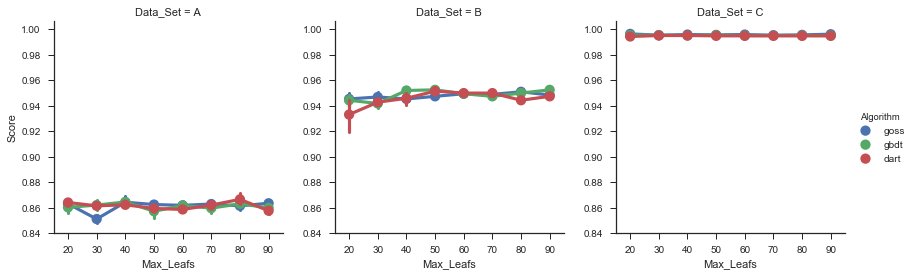

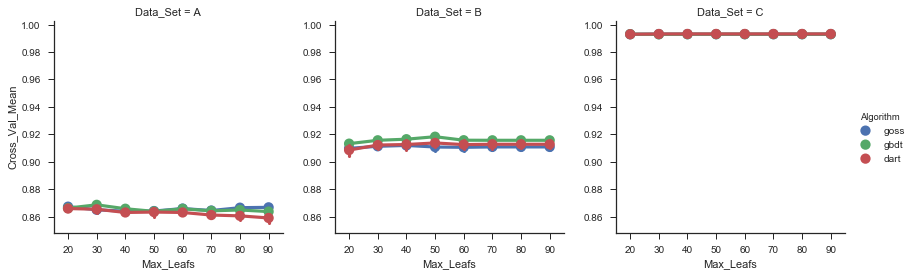

In [81]:
results.to_csv('21022018_Tuning_results_LGBCv2.csv')
first=sns.factorplot(x='Max_Leafs',y='Score',hue='Algorithm',col='Data_Set',data=results) 
second=sns.factorplot(x='Max_Leafs',y='Cross_Val_Mean',hue='Algorithm',col='Data_Set',data=results) 

In [ ]:
second=sns.factorplot(x='Max_Leafs',y='Score',hue='Algorithm',col='Cross_Val_Mean',data=results) 
